# 1. Defining Problem Statement and Analysing Basic Metrics

## Problem Statement: 
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import sys as s
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv("/Users/vidish/Desktop/dev/python/jupyter_notebooks/business_cases/case2_aerofit/aerofit_treadmill.csv")
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Creating separate dataframes for each product:

In [3]:
product_groups = df.groupby("Product")
product_dfs = {}
for products, groups in product_groups:
    product_dfs[products] = groups

df_kp281 = product_dfs["KP281"]
df_kp481 = product_dfs["KP481"]
df_kp781 = product_dfs["KP781"]

In [4]:
df_kp281.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df_kp481.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
84,KP481,21,Female,14,Partnered,5,4,34110,212


In [6]:
df_kp781.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100


### Descriptive Analytics (Overall Data)

In [7]:
df.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df.shape

(180, 9)

### Descriptive Analytics (For KP281)

In [10]:
df_kp281.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.00000,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,NaN,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,2.96250,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,0.66454,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.00000,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,3.00000,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,3.00000,53439.00000,94.000000


In [11]:
df_kp281.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        80 non-null     object
 1   Age            80 non-null     int64 
 2   Gender         80 non-null     object
 3   Education      80 non-null     int64 
 4   MaritalStatus  80 non-null     object
 5   Usage          80 non-null     int64 
 6   Fitness        80 non-null     int64 
 7   Income         80 non-null     int64 
 8   Miles          80 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 6.2+ KB


In [12]:
df_kp281.shape

(80, 9)

### Descriptive Analytics (For KP481)

In [13]:
df_kp481.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.00000,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP481,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,NaN,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,2.90000,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,0.62977,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,1.00000,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.00000,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,3.00000,53439.000000,106.000000


In [14]:
df_kp481.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 80 to 139
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        60 non-null     object
 1   Age            60 non-null     int64 
 2   Gender         60 non-null     object
 3   Education      60 non-null     int64 
 4   MaritalStatus  60 non-null     object
 5   Usage          60 non-null     int64 
 6   Fitness        60 non-null     int64 
 7   Income         60 non-null     int64 
 8   Miles          60 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 4.7+ KB


In [15]:
df_kp481.shape

(60, 9)

### Descriptive Analytics (For KP781)

In [16]:
df_kp781.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.000000,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP781,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,NaN,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,4.625000,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,0.667467,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,3.000000,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,4.000000,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,5.000000,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,5.000000,90886.00000,200.000000


In [17]:
df_kp781.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 140 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        40 non-null     object
 1   Age            40 non-null     int64 
 2   Gender         40 non-null     object
 3   Education      40 non-null     int64 
 4   MaritalStatus  40 non-null     object
 5   Usage          40 non-null     int64 
 6   Fitness        40 non-null     int64 
 7   Income         40 non-null     int64 
 8   Miles          40 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 3.1+ KB


In [18]:
df_kp781.shape

(40, 9)

## Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary:
1. The overall dataframe contains 180 rows and 9 columns.
2. The dataframe for KP281 contains 80 rows and 9 columns.
3. The dataframe for KP481 contains 60 rows and 9 columns.
4. The dataframe for KP781 contains 40 rows and 9 columns.
5. The columns "Product", "Gender" and "MaritalStatus" are of object data type.
6. The columns "Age", "Education", "Usage", "Fitness", "Income", and "Miles" are of integer data type.
7. The following describes the units in which each of the columns is measured in:
    - "Product
    - "Age": in Years
    - "Gender": Male/ Female
    - "Education": in Years
    - "MaritialStatus": Single/ Parterned
    - "Usage": The average number of times the customer plans to use the threadmill each week
    - "Income": Annual Income in Dollars
    - "Fitness": Self-rated fitness on a 1 to 5 scale, where 1 is the poor shape and 5 is the excellent shape
8. The stastical summary is shown in,
    - Line #7 for Overall Dataset
    - Line #10 for KP281
    - Line #13 for KP481
    - Line #16 for KP781

# 2. Non-Graphical Analysis: Value counts and unique attributes

### Value Counts for KP281

In [19]:
age_count_kp281 = df_kp281["Age"].value_counts().sort_values(ascending = False)
age_count_kp281 = pd.DataFrame(age_count_kp281).reset_index()
age_count_kp281

,Age,count
0,23,8
1,26,7
2,25,7
3,28,6
4,24,5
5,38,4
6,21,4
7,22,4
8,29,3
9,19,3


In [20]:
gender_count_kp281 = df_kp281["Gender"].value_counts().sort_values(ascending = False)
gender_count_kp281 = pd.DataFrame(gender_count_kp281).reset_index()
gender_count_kp281

,Gender,count
0,Male,40
1,Female,40


In [21]:
education_count_kp281 = df_kp281["Education"].value_counts().sort_values(ascending = False)
education_count_kp281 = pd.DataFrame(education_count_kp281).reset_index()
education_count_kp281

,Education,count
0,16,39
1,14,30
2,15,4
3,13,3
4,12,2
5,18,2


In [22]:
marital_counts_kp281 = df_kp281["MaritalStatus"].value_counts().sort_values(ascending = False)
marital_counts_kp281 = pd.DataFrame(marital_counts_kp281).reset_index()
marital_counts_kp281

,MaritalStatus,count
0,Partnered,48
1,Single,32


In [23]:
usage_count_kp281 = df_kp281["Usage"].value_counts().sort_values(ascending = False)
usage_count_kp281 = pd.DataFrame(usage_count_kp281).reset_index()
usage_count_kp281

,Usage,count
0,3,37
1,4,22
2,2,19
3,5,2


In [24]:
fitness_counts_kp281 = df_kp281["Fitness"].value_counts().sort_values(ascending = False)
fitness_counts_kp281 = pd.DataFrame(fitness_counts_kp281).reset_index()
fitness_counts_kp281

,Fitness,count
0,3,54
1,2,14
2,4,9
3,5,2
4,1,1


### Value Counts for KP481

In [25]:
age_count_kp481 = df_kp481["Age"].value_counts().sort_values(ascending = False)
age_count_kp481 = pd.DataFrame(age_count_kp481).reset_index()
age_count_kp481

,Age,count
0,25,11
1,23,7
2,33,5
3,35,4
4,26,3
5,20,3
6,40,3
7,34,3
8,24,3
9,21,3


In [26]:
gender_count_kp481 = df_kp481["Gender"].value_counts().sort_values(ascending = False)
gender_count_kp481 = pd.DataFrame(gender_count_kp481).reset_index()
gender_count_kp481

,Gender,count
0,Male,31
1,Female,29


In [27]:
education_count_kp481 = df_kp481["Education"].value_counts().sort_values(ascending = False)
education_count_kp481 = pd.DataFrame(education_count_kp481).reset_index()
education_count_kp481

,Education,count
0,16,31
1,14,23
2,13,2
3,18,2
4,12,1
5,15,1


In [28]:
marital_counts_kp481 = df_kp481["MaritalStatus"].value_counts().sort_values(ascending = False)
marital_counts_kp481 = pd.DataFrame(marital_counts_kp481).reset_index()
marital_counts_kp481

,MaritalStatus,count
0,Partnered,36
1,Single,24


In [29]:
usage_count_kp481 = df_kp481["Usage"].value_counts().sort_values(ascending = False)
usage_count_kp481 = pd.DataFrame(usage_count_kp481).reset_index()
usage_count_kp481

,Usage,count
0,3,31
1,2,14
2,4,12
3,5,3


In [30]:
fitness_counts_kp481 = df_kp481["Fitness"].value_counts().sort_values(ascending = False)
fitness_counts_kp481 = pd.DataFrame(fitness_counts_kp481).reset_index()
fitness_counts_kp481

,Fitness,count
0,3,39
1,2,12
2,4,8
3,1,1


### Value Counts for KP781

In [31]:
age_count_kp781 = df_kp781["Age"].value_counts().sort_values(ascending = False)
age_count_kp781 = pd.DataFrame(age_count_kp781).reset_index()
age_count_kp781

,Age,count
0,25,7
1,24,4
2,22,3
3,27,3
4,28,3
5,30,3
6,23,3
7,26,2
8,29,2
9,38,1


In [32]:
gender_count_kp781 = df_kp781["Gender"].value_counts().sort_values(ascending = False)
gender_count_kp781 = pd.DataFrame(gender_count_kp781).reset_index()
gender_count_kp781

,Gender,count
0,Male,33
1,Female,7


In [33]:
education_count_kp781 = df_kp781["Education"].value_counts().sort_values(ascending = False)
education_count_kp781 = pd.DataFrame(education_count_kp781).reset_index()
education_count_kp781

,Education,count
0,18,19
1,16,15
2,21,3
3,14,2
4,20,1


In [34]:
marital_counts_kp781 = df_kp781["MaritalStatus"].value_counts().sort_values(ascending = False)
marital_counts_kp781 = pd.DataFrame(marital_counts_kp781).reset_index()
marital_counts_kp781

,MaritalStatus,count
0,Partnered,23
1,Single,17


In [35]:
usage_count_kp781 = df_kp781["Usage"].value_counts().sort_values(ascending = False)
usage_count_kp781 = pd.DataFrame(usage_count_kp781).reset_index()
usage_count_kp781

,Usage,count
0,4,18
1,5,12
2,6,7
3,7,2
4,3,1


In [36]:
fitness_counts_kp781 = df_kp781["Fitness"].value_counts().sort_values(ascending = False)
fitness_counts_kp781 = pd.DataFrame(fitness_counts_kp781).reset_index()
fitness_counts_kp781

,Fitness,count
0,5,29
1,4,7
2,3,4


### Unique Attributes in KP281

In [37]:
ages_unique_kp281 = df_kp281["Age"].unique()
print(f"The following is the list of ages of the customers who have purchased KP281 threadmill = \n{ages_unique_kp281}")
ages_nunique_kp281 = df_kp281["Age"].nunique()
print(f"Total count of unique ages of customers who purchased KP281 = {ages_nunique_kp281}")
ages_min_kp281 = df_kp281["Age"].min()
print(f"The youngest customer who purchased KP281 = {ages_min_kp281}")
ages_max_kp281 = df_kp281["Age"].max()
print(f"The oldest customer who purchased KP281 = {ages_max_kp281}")
ages_mean_kp281 = df_kp281["Age"].mean()
print(f"Average of age of customers who purchased KP281 = {ages_mean_kp281}")

The following is the list of ages of the customers who have purchased KP281 threadmill = 
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50]
Total count of unique ages of customers who purchased KP281 = 29
The youngest customer who purchased KP281 = 18
The oldest customer who purchased KP281 = 50
Average of age of customers who purchased KP281 = 28.55


In [38]:
education_unique_kp281 = df_kp281["Education"].unique()
print(f"The following is the list of years of education that the customers who have purchase KP281 threadmill have had = \n{education_unique_kp281}")
education_nunique_kp281 = df_kp281["Education"].nunique()
print(f"The total number of unique years of education of customers who purchased KP281 = {education_nunique_kp281}")
education_min_kp281 = df_kp281["Education"].min()
print(f"The minimum number years of education of the customers who purchased KP281 = {education_min_kp281}")
education_max_kp281 = df_kp281["Education"].max()
print(f"The maximum number years of education of the customers who purchased KP281 = {education_max_kp281}")
education_mean_kp281 = df_kp281["Education"].mean()
print(f"The average of number years of education of the customers who purchased KP281 = {education_mean_kp281}")

The following is the list of years of education that the customers who have purchase KP281 threadmill have had = 
[14 15 12 13 16 18]
The total number of unique years of education of customers who purchased KP281 = 6
The minimum number years of education of the customers who purchased KP281 = 12
The maximum number years of education of the customers who purchased KP281 = 18
The average of number years of education of the customers who purchased KP281 = 15.0375


In [39]:
usage_unique_kp281 = df_kp281["Usage"].unique()
print(f"The following is the list of the average number of times the customer plans to use KP281 = {usage_unique_kp281}")
usage_nunique_kp281 = df_kp281["Usage"].nunique()
print(f"The number of unique average number of times customer plans to use KP281 = {usage_nunique_kp281}")
usage_min_kp281 = df_kp281["Usage"].min()
print(f"The minimum number of times that the customer plans to use KP281 = {usage_min_kp281}")
usage_max_kp281 = df_kp281["Usage"].max()
print(f"The maximum number of times that the customer plans to use KP281 = {usage_max_kp281}")
usage_mean_kp281 = df_kp281["Usage"].mean()
print(f"The overall average of number of times the customer plans to use KP281 = {usage_mean_kp281}")

The following is the list of the average number of times the customer plans to use KP281 = [3 2 4 5]
The number of unique average number of times customer plans to use KP281 = 4
The minimum number of times that the customer plans to use KP281 = 2
The maximum number of times that the customer plans to use KP281 = 5
The overall average of number of times the customer plans to use KP281 = 3.0875


In [40]:
income_unique_kp281 = df_kp281["Income"].unique()
print(f"The following is the list of all the unique incomes that the customer who purchased KP281 have annually = \n{income_unique_kp281}")
income_nunique_kp281 = df_kp281["Income"].nunique()
print(f"The following are the total number of uniques incomes of the customer who purchased KP281 = {income_nunique_kp281}")
income_min_kp281 = df_kp281["Income"].min()
print(f"The minimum annual income of the customers who purchased KP281 = {income_min_kp281}")
income_max_kp281 = df_kp281["Income"].max()
print(f"The maximum annual income of the customers who purchased KP281 = {income_max_kp281}")
income_mean_kp281 = df_kp281["Income"].mean()
print(f"The average of annual income of customers who purchased KP281 = {income_mean_kp281}")

The following is the list of all the unique incomes that the customer who purchased KP281 have annually = 
[29562 31836 30699 32973 35247 37521 36384 38658 40932 34110 39795 42069
 44343 45480 46617 48891 53439 43206 52302 51165 50028 54576 68220 55713
 60261 67083 56850 59124 61398 57987 64809]
The following are the total number of uniques incomes of the customer who purchased KP281 = 31
The minimum annual income of the customers who purchased KP281 = 29562
The maximum annual income of the customers who purchased KP281 = 68220
The average of annual income of customers who purchased KP281 = 46418.025


In [41]:
fitness_unique_kp281 = df_kp281["Fitness"].unique()
print(f"The following is the list of unique fitness that the customers who purchased KP281 have given themselves = \n{fitness_unique_kp281}")
fitness_nunique_kp281 = df_kp281["Fitness"].nunique()
print(f"The total number of unique fitness ratings of customer who purchased KP281 = {fitness_nunique_kp281}")
fitness_min_kp281 = df_kp281["Fitness"].min()
print(f"The minimum fitness rating of the customers who purchased KP281 = {fitness_min_kp281}")
fitness_max_kp281 = df_kp281["Fitness"].max()
print(f"The maximum fitness rating of the customers who purchased KP281 = {fitness_max_kp281}")
fitness_mean_kp281 = df_kp281["Fitness"].mean()
print(f"The average of fitness rating of the customers who purchased KP281 = {fitness_mean_kp281}")

The following is the list of unique fitness that the customers who purchased KP281 have given themselves = 
[4 3 2 1 5]
The total number of unique fitness ratings of customer who purchased KP281 = 5
The minimum fitness rating of the customers who purchased KP281 = 1
The maximum fitness rating of the customers who purchased KP281 = 5
The average of fitness rating of the customers who purchased KP281 = 2.9625


In [42]:
miles_unique_kp281 = df_kp281["Miles"].unique()
print(f"The following is the list of unique number of average miles that the customers who purchased KP281 \nplan to run or walk for = {miles_unique_kp281}")
miles_nuniqe_kp281 = df_kp281["Miles"].nunique()
print(f"Total number of unique miles that customer who purchased KP281 plans to run or walk for = {miles_nuniqe_kp281}")
miles_min_kp281 = df_kp281["Miles"].min()
print(f"The minimum number of miles that customers who purchased KP281 plan to run or walk for = {miles_min_kp281}")
miles_max_kp281 = df_kp281["Miles"].max()
print(f"The maximum number of miles that customers who purchased KP281 plan to run or walk for = {miles_max_kp281}")
miles_mean_kp281 = df_kp281["Miles"].mean()
print(f"The average of number of miles that customers who purchased KP281 plan to run or walk for = {miles_mean_kp281}")

The following is the list of unique number of average miles that the customers who purchased KP281 
plan to run or walk for = [112  75  66  85  47 141 103  94 113  38 188  56 132 169]
Total number of unique miles that customer who purchased KP281 plans to run or walk for = 14
The minimum number of miles that customers who purchased KP281 plan to run or walk for = 38
The maximum number of miles that customers who purchased KP281 plan to run or walk for = 188
The average of number of miles that customers who purchased KP281 plan to run or walk for = 82.7875


### Unique Attributes in KP481

In [43]:
ages_unique_kp481 = df_kp481["Age"].unique()
print(f"The following is the list of ages of the customers who have purchased KP481 threadmill = \n{ages_unique_kp481}")
ages_nunique_kp481 = df_kp481["Age"].nunique()
print(f"Total count of unique ages of customers who purchased KP481 = {ages_nunique_kp481}")
ages_min_kp481 = df_kp481["Age"].min()
print(f"The youngest customer who purchased KP481 = {ages_min_kp481}")
ages_max_kp481 = df_kp481["Age"].max()
print(f"The oldest customer who purchased KP481 = {ages_max_kp481}")
ages_mean_kp481 = df_kp481["Age"].mean()
print(f"Average of age of customers who purchased KP481 = {ages_mean_kp481}")

The following is the list of ages of the customers who have purchased KP481 threadmill = 
[19 20 21 23 24 25 26 27 29 30 31 32 33 34 35 37 38 40 45 48]
Total count of unique ages of customers who purchased KP481 = 20
The youngest customer who purchased KP481 = 19
The oldest customer who purchased KP481 = 48
Average of age of customers who purchased KP481 = 28.9


In [44]:
education_unique_kp481 = df_kp481["Education"].unique()
print(f"The following is the list of years of education that the customers who have purchase KP481 threadmill have had = \n{education_unique_kp481}")
education_nunique_kp481 = df_kp481["Education"].nunique()
print(f"The total number of unique years of education of customers who purchased KP481 = {education_nunique_kp481}")
education_min_kp481 = df_kp481["Education"].min()
print(f"The minimum number years of education of the customers who purchased KP481 = {education_min_kp481}")
education_max_kp481 = df_kp481["Education"].max()
print(f"The maximum number years of education of the customers who purchased KP481 = {education_max_kp481}")
education_mean_kp481 = df_kp481["Education"].mean()
print(f"The average of number years of education of the customers who purchased KP481 = {education_mean_kp481}")

The following is the list of years of education that the customers who have purchase KP481 threadmill have had = 
[14 16 12 13 18 15]
The total number of unique years of education of customers who purchased KP481 = 6
The minimum number years of education of the customers who purchased KP481 = 12
The maximum number years of education of the customers who purchased KP481 = 18
The average of number years of education of the customers who purchased KP481 = 15.116666666666667


In [45]:
usage_unique_kp481 = df_kp481["Usage"].unique()
print(f"The following is the list of the average number of times the customer plans to use KP481 = {usage_unique_kp481}")
usage_nunique_kp481 = df_kp481["Usage"].nunique()
print(f"The number of unique average number of times customer plans to use KP481 = {usage_nunique_kp481}")
usage_min_kp481 = df_kp481["Usage"].min()
print(f"The minimum number of times that the customer plans to use KP481 = {usage_min_kp481}")
usage_max_kp481 = df_kp481["Usage"].max()
print(f"The maximum number of times that the customer plans to use KP481 = {usage_max_kp481}")
usage_mean_kp481 = df_kp481["Usage"].mean()
print(f"The overall average of number of times the customer plans to use KP481 = {usage_mean_kp481}")

The following is the list of the average number of times the customer plans to use KP481 = [3 2 5 4]
The number of unique average number of times customer plans to use KP481 = 4
The minimum number of times that the customer plans to use KP481 = 2
The maximum number of times that the customer plans to use KP481 = 5
The overall average of number of times the customer plans to use KP481 = 3.066666666666667


In [46]:
income_unique_kp481 = df_kp481["Income"].unique()
print(f"The following is the list of all the unique incomes that the customer who purchased KP481 have annually = \n{income_unique_kp481}")
income_nunique_kp481 = df_kp481["Income"].nunique()
print(f"The following are the total number of uniques incomes of the customer who purchased KP481 = {income_nunique_kp481}")
income_min_kp481 = df_kp481["Income"].min()
print(f"The minimum annual income of the customers who purchased KP481 = {income_min_kp481}")
income_max_kp481 = df_kp481["Income"].max()
print(f"The maximum annual income of the customers who purchased KP481 = {income_max_kp481}")
income_mean_kp481 = df_kp481["Income"].mean()
print(f"The average of annual income of customers who purchased KP481 = {income_mean_kp481}")

The following is the list of all the unique incomes that the customer who purchased KP481 have annually = 
[31836 32973 34110 38658 36384 45480 43206 40932 48891 50028 52302 47754
 51165 57987 46617 65220 60261 53439 64809 59124 67083 62535 61398 54576]
The following are the total number of uniques incomes of the customer who purchased KP481 = 24
The minimum annual income of the customers who purchased KP481 = 31836
The maximum annual income of the customers who purchased KP481 = 67083
The average of annual income of customers who purchased KP481 = 48973.65


In [47]:
fitness_unique_kp481 = df_kp481["Fitness"].unique()
print(f"The following is the list of unique fitness that the customers who purchased KP481 have given themselves = \n{fitness_unique_kp481}")
fitness_nunique_kp481 = df_kp481["Fitness"].nunique()
print(f"The total number of unique fitness ratings of customer who purchased KP481 = {fitness_nunique_kp481}")
fitness_min_kp481 = df_kp481["Fitness"].min()
print(f"The minimum fitness rating of the customers who purchased KP481 = {fitness_min_kp481}")
fitness_max_kp481 = df_kp481["Fitness"].max()
print(f"The maximum fitness rating of the customers who purchased KP481 = {fitness_max_kp481}")
fitness_mean_kp481 = df_kp481["Fitness"].mean()
print(f"The average of fitness rating of the customers who purchased KP481 = {fitness_mean_kp481}")

The following is the list of unique fitness that the customers who purchased KP481 have given themselves = 
[3 4 2 1]
The total number of unique fitness ratings of customer who purchased KP481 = 4
The minimum fitness rating of the customers who purchased KP481 = 1
The maximum fitness rating of the customers who purchased KP481 = 4
The average of fitness rating of the customers who purchased KP481 = 2.9


In [48]:
miles_unique_kp481 = df_kp481["Miles"].unique()
print(f"The following is the list of unique number of average miles that the customers who purchased KP481 \nplan to run or walk for = {miles_unique_kp481}")
miles_nuniqe_kp481 = df_kp481["Miles"].nunique()
print(f"Total number of unique miles that customer who purchased KP481 plans to run or walk for = {miles_nuniqe_kp481}")
miles_min_kp481 = df_kp481["Miles"].min()
print(f"The minimum number of miles that customers who purchased KP481 plan to run or walk for = {miles_min_kp481}")
miles_max_kp481 = df_kp481["Miles"].max()
print(f"The maximum number of miles that customers who purchased KP481 plan to run or walk for = {miles_max_kp481}")
miles_mean_kp481 = df_kp481["Miles"].mean()
print(f"The average of number of miles that customers who purchased KP481 plan to run or walk for = {miles_mean_kp481}")

The following is the list of unique number of average miles that the customers who purchased KP481 
plan to run or walk for = [ 64  53 106  95 212  42  85 127  74 170  21]
Total number of unique miles that customer who purchased KP481 plans to run or walk for = 11
The minimum number of miles that customers who purchased KP481 plan to run or walk for = 21
The maximum number of miles that customers who purchased KP481 plan to run or walk for = 212
The average of number of miles that customers who purchased KP481 plan to run or walk for = 87.93333333333334


### Unique Attributes in KP781

In [49]:
ages_unique_kp781 = df_kp781["Age"].unique()
print(f"The following is the list of ages of the customers who have purchased KP781 threadmill = \n{ages_unique_kp781}")
ages_nunique_kp781 = df_kp781["Age"].nunique()
print(f"Total count of unique ages of customers who purchased KP781 = {ages_nunique_kp781}")
ages_min_kp781 = df_kp781["Age"].min()
print(f"The youngest customer who purchased KP781 = {ages_min_kp781}")
ages_max_kp781 = df_kp781["Age"].max()
print(f"The oldest customer who purchased KP781 = {ages_max_kp781}")
ages_mean_kp781 = df_kp781["Age"].mean()
print(f"Average of age of customers who purchased KP781 = {ages_mean_kp781}")

The following is the list of ages of the customers who have purchased KP781 threadmill = 
[22 23 24 25 26 27 28 29 30 31 33 34 35 38 40 42 45 47 48]
Total count of unique ages of customers who purchased KP781 = 19
The youngest customer who purchased KP781 = 22
The oldest customer who purchased KP781 = 48
Average of age of customers who purchased KP781 = 29.1


In [50]:
education_unique_kp781 = df_kp781["Education"].unique()
print(f"The following is the list of years of education that the customers who have purchase KP781 threadmill have had = \n{education_unique_kp781}")
education_nunique_kp781 = df_kp781["Education"].nunique()
print(f"The total number of unique years of education of customers who purchased KP781 = {education_nunique_kp781}")
education_min_kp781 = df_kp781["Education"].min()
print(f"The minimum number years of education of the customers who purchased KP781 = {education_min_kp781}")
education_max_kp781 = df_kp781["Education"].max()
print(f"The maximum number years of education of the customers who purchased KP781 = {education_max_kp781}")
education_mean_kp781 = df_kp781["Education"].mean()
print(f"The average of number years of education of the customers who purchased KP781 = {education_mean_kp781}")

The following is the list of years of education that the customers who have purchase KP781 threadmill have had = 
[14 16 18 20 21]
The total number of unique years of education of customers who purchased KP781 = 5
The minimum number years of education of the customers who purchased KP781 = 14
The maximum number years of education of the customers who purchased KP781 = 21
The average of number years of education of the customers who purchased KP781 = 17.325


In [51]:
usage_unique_kp781 = df_kp781["Usage"].unique()
print(f"The following is the list of the average number of times the customer plans to use KP781 = {usage_unique_kp781}")
usage_nunique_kp781 = df_kp781["Usage"].nunique()
print(f"The number of unique average number of times customer plans to use KP781 = {usage_nunique_kp781}")
usage_min_kp781 = df_kp781["Usage"].min()
print(f"The minimum number of times that the customer plans to use KP781 = {usage_min_kp781}")
usage_max_kp781 = df_kp781["Usage"].max()
print(f"The maximum number of times that the customer plans to use KP781 = {usage_max_kp781}")
usage_mean_kp781 = df_kp781["Usage"].mean()
print(f"The overall average of number of times the customer plans to use KP781 = {usage_mean_kp781}")

The following is the list of the average number of times the customer plans to use KP781 = [4 3 5 6 7]
The number of unique average number of times customer plans to use KP781 = 5
The minimum number of times that the customer plans to use KP781 = 3
The maximum number of times that the customer plans to use KP781 = 7
The overall average of number of times the customer plans to use KP781 = 4.775


In [52]:
income_unique_kp781 = df_kp781["Income"].unique()
print(f"The following is the list of all the unique incomes that the customer who purchased KP781 have annually = \n{income_unique_kp781}")
income_nunique_kp781 = df_kp781["Income"].nunique()
print(f"The following are the total number of uniques incomes of the customer who purchased KP781 = {income_nunique_kp781}")
income_min_kp781 = df_kp781["Income"].min()
print(f"The minimum annual income of the customers who purchased KP781 = {income_min_kp781}")
income_max_kp781 = df_kp781["Income"].max()
print(f"The maximum annual income of the customers who purchased KP781 = {income_max_kp781}")
income_mean_kp781 = df_kp781["Income"].mean()
print(f"The average of annual income of customers who purchased KP781 = {income_mean_kp781}")

The following is the list of all the unique incomes that the customer who purchased KP781 have annually = 
[ 48658  54781  48556  58516  53536  61006  57271  52291  49801  62251
  64741  70966  75946  74701  69721  83416  88396  90886  92131  77191
  52290  85906 103336  99601  89641  95866 104581  95508]
The following are the total number of uniques incomes of the customer who purchased KP781 = 28
The minimum annual income of the customers who purchased KP781 = 48556
The maximum annual income of the customers who purchased KP781 = 104581
The average of annual income of customers who purchased KP781 = 75441.575


In [53]:
fitness_unique_kp781 = df_kp781["Fitness"].unique()
print(f"The following is the list of unique fitness that the customers who purchased KP781 have given themselves = \n{fitness_unique_kp781}")
fitness_nunique_kp781 = df_kp781["Fitness"].nunique()
print(f"The total number of unique fitness ratings of customer who purchased KP781 = {fitness_nunique_kp781}")
fitness_min_kp781 = df_kp781["Fitness"].min()
print(f"The minimum fitness rating of the customers who purchased KP781 = {fitness_min_kp781}")
fitness_max_kp781 = df_kp781["Fitness"].max()
print(f"The maximum fitness rating of the customers who purchased KP781 = {fitness_max_kp781}")
fitness_mean_kp781 = df_kp781["Fitness"].mean()
print(f"The average of fitness rating of the customers who purchased KP781 = {fitness_mean_kp781}")

The following is the list of unique fitness that the customers who purchased KP781 have given themselves = 
[3 5 4]
The total number of unique fitness ratings of customer who purchased KP781 = 3
The minimum fitness rating of the customers who purchased KP781 = 3
The maximum fitness rating of the customers who purchased KP781 = 5
The average of fitness rating of the customers who purchased KP781 = 4.625


In [54]:
miles_unique_kp781 = df_kp781["Miles"].unique()
print(f"The following is the list of unique number of average miles that the customers who purchased KP781 \nplan to run or walk for = {miles_unique_kp781}")
miles_nuniqe_kp781 = df_kp781["Miles"].nunique()
print(f"Total number of unique miles that customer who purchased KP781 plans to run or walk for = {miles_nuniqe_kp781}")
miles_min_kp781 = df_kp781["Miles"].min()
print(f"The minimum number of miles that customers who purchased KP781 plan to run or walk for = {miles_min_kp781}")
miles_max_kp781 = df_kp781["Miles"].max()
print(f"The maximum number of miles that customers who purchased KP781 plan to run or walk for = {miles_max_kp781}")
miles_mean_kp781 = df_kp781["Miles"].mean()
print(f"The average of number of miles that customers who purchased KP781 plan to run or walk for = {miles_mean_kp781}")

The following is the list of unique number of average miles that the customers who purchased KP781 
plan to run or walk for = [106 120 200 140 100  80 160 180 240 170 150 300 280 260 360]
Total number of unique miles that customer who purchased KP781 plans to run or walk for = 15
The minimum number of miles that customers who purchased KP781 plan to run or walk for = 80
The maximum number of miles that customers who purchased KP781 plan to run or walk for = 360
The average of number of miles that customers who purchased KP781 plan to run or walk for = 166.9


### Two Way Contingency Table

In [55]:
# creating cross-tabs for each product
kp281_contingency = pd.crosstab(df_kp281["Gender"], df_kp281["MaritalStatus"])
kp481_contingency = pd.crosstab(df_kp481["Gender"], df_kp481["MaritalStatus"])
kp781_contingency = pd.crosstab(df_kp781["Gender"], df_kp781["MaritalStatus"])

# computing conditional probabilities for each product
kp281_cond_prob = kp281_contingency/ kp281_contingency.sum().sum()
kp481_cond_prob = kp481_contingency/ kp481_contingency.sum().sum()
kp781_cond_prob = kp781_contingency/ kp781_contingency.sum().sum()

# computing marginal probabilities for each product
kp281_marginal_prob_gender = kp281_contingency.sum(axis=0)/ kp281_contingency.sum().sum()
kp281_marginal_prob_marital = kp281_contingency.sum(axis=1)/ kp281_contingency.sum().sum()

kp481_marginal_prob_gender = kp481_contingency.sum(axis=0)/ kp481_contingency.sum().sum()
kp481_marginal_prob_marital = kp481_contingency.sum(axis=1)/ kp481_contingency.sum().sum()

kp781_marginal_prob_gender = kp781_contingency.sum(axis=0)/ kp781_contingency.sum().sum()
kp781_marginal_prob_marital = kp781_contingency.sum(axis=1)/ kp781_contingency.sum().sum()

# two-way contingency tables for each product
print("KP281 Contingency Table:")
print(kp281_contingency)
print()

print("KP481 Contingency Table:")
print(kp481_contingency)
print()

print("KP781 Contingency Table:")
print(kp781_contingency)
print()

# conditional probabilities for each product
print("KP281 Conditional Probabilities:")
print(kp281_cond_prob)
print()

print("KP481 Conditional Probabilities:")
print(kp481_cond_prob)
print()

print("KP781 Conditional Probabilities:")
print(kp781_cond_prob)
print()

# marginal probabilities for each product
print("KP281 Marginal Probabilities (Gender):")
print(kp281_marginal_prob_gender)
print()

print("KP281 Marginal Probabilities (Marital Status):")
print(kp281_marginal_prob_marital)
print()

print("KP481 Marginal Probabilities (Gender):")
print(kp481_marginal_prob_gender)
print()

print("KP481 Marginal Probabilities (Marital Status):")
print(kp481_marginal_prob_marital)
print()

print("KP781 Marginal Probabilities (Gender):")
print(kp781_marginal_prob_gender)
print()

print("KP781 Marginal Probabilities (Marital Status):")
print(kp781_marginal_prob_marital)
print()

KP281 Contingency Table:
MaritalStatus  Partnered  Single
Gender                          
Female                27      13
Male                  21      19

KP481 Contingency Table:
MaritalStatus  Partnered  Single
Gender                          
Female                15      14
Male                  21      10

KP781 Contingency Table:
MaritalStatus  Partnered  Single
Gender                          
Female                 4       3
Male                  19      14

KP281 Conditional Probabilities:
MaritalStatus  Partnered  Single
Gender                          
Female            0.3375  0.1625
Male              0.2625  0.2375

KP481 Conditional Probabilities:
MaritalStatus  Partnered    Single
Gender                            
Female              0.25  0.233333
Male                0.35  0.166667

KP781 Conditional Probabilities:
MaritalStatus  Partnered  Single
Gender                          
Female             0.100   0.075
Male               0.475   0.350

KP281 Marginal Proba

# 3. Visual Analysis - Univariate & Bivariate 

### Visual Analytics of KP281

/var/folders/7t/wnyn31qs37gg4xdxsbzlpmrh0000gn/T/ipykernel_17693/1682238905.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kp281[column], kde=False)


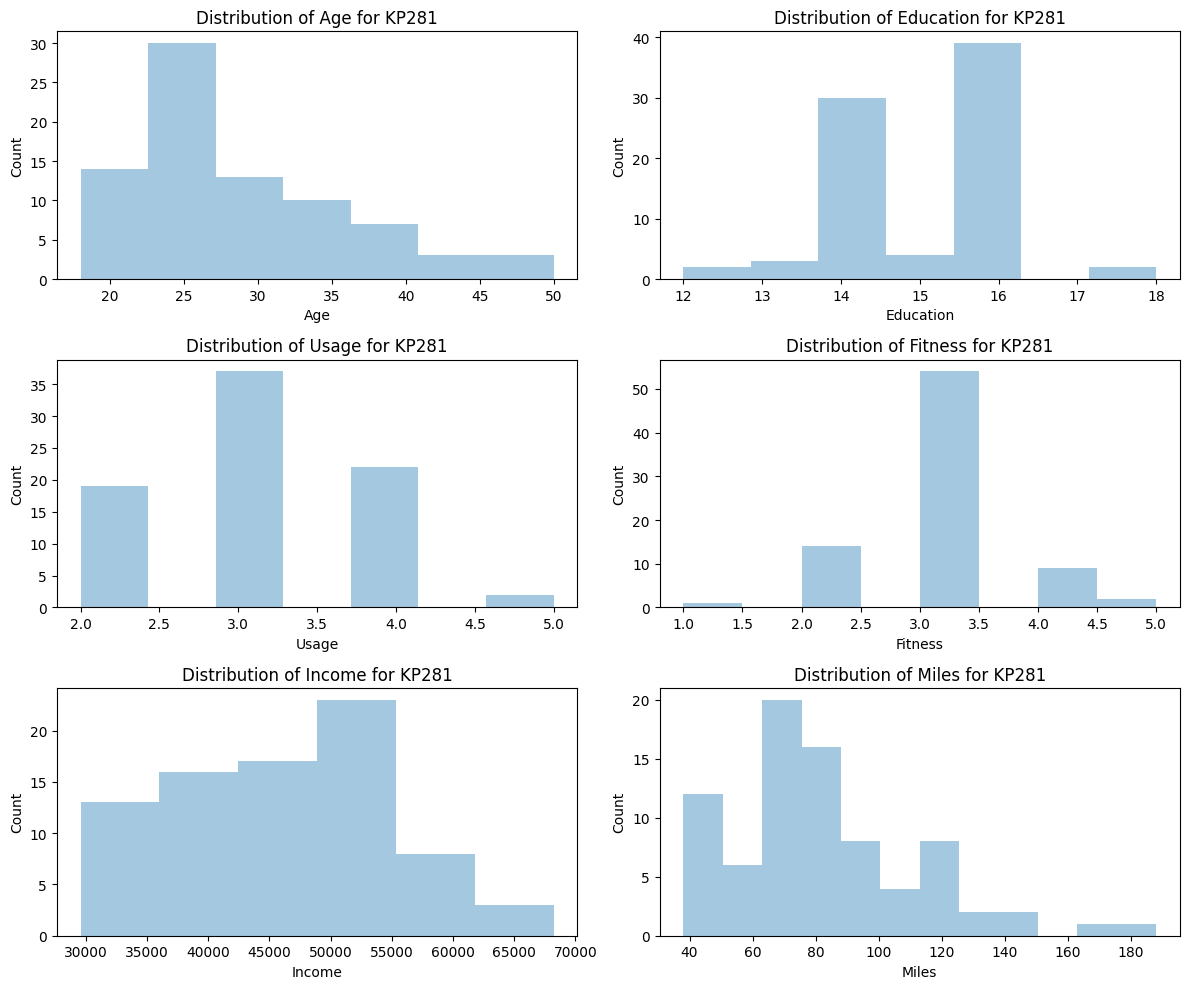

In [56]:
# distplot for numerical data in KP281
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.distplot(df_kp281[column], kde=False)
    plt.title(f"Distribution of {column} for KP281")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

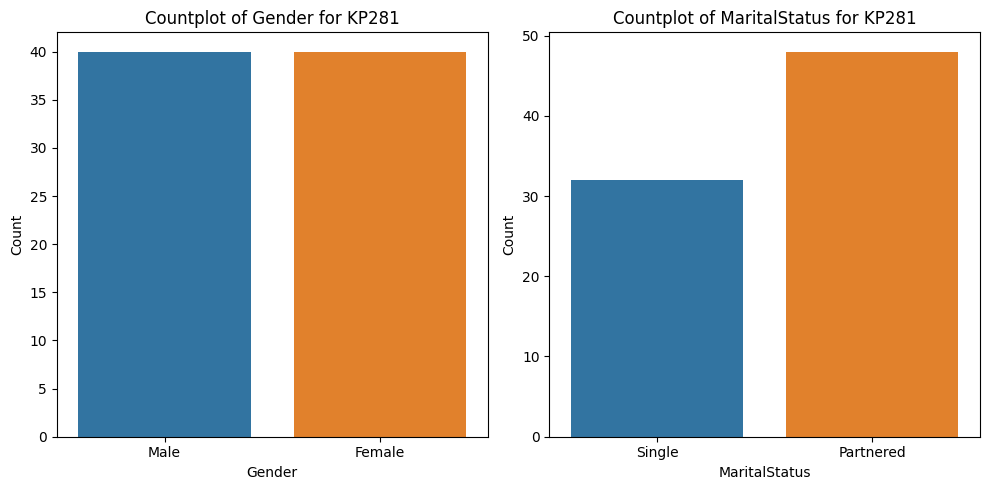

In [57]:
# countplot for categorical data in KP281
categorical_columns = ["Gender", "MaritalStatus"]
plt.figure(figsize=(10, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df_kp281, x=column)
    plt.title(f"Countplot of {column} for KP281")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

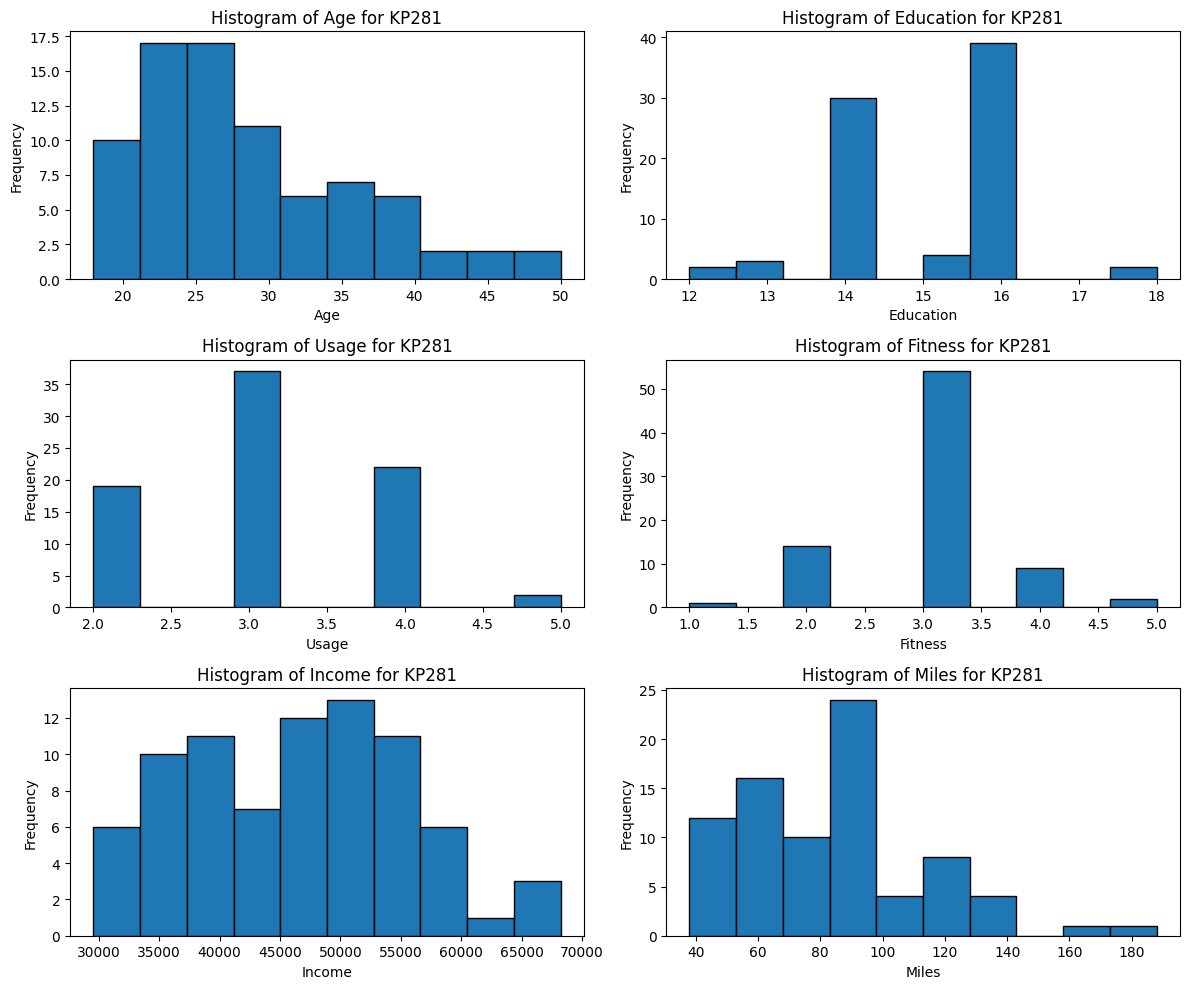

In [58]:
# histograms for all numerical data in KP281
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    plt.hist(df_kp281[column], bins=10, edgecolor="black")
    plt.title(f"Histogram of {column} for KP281")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

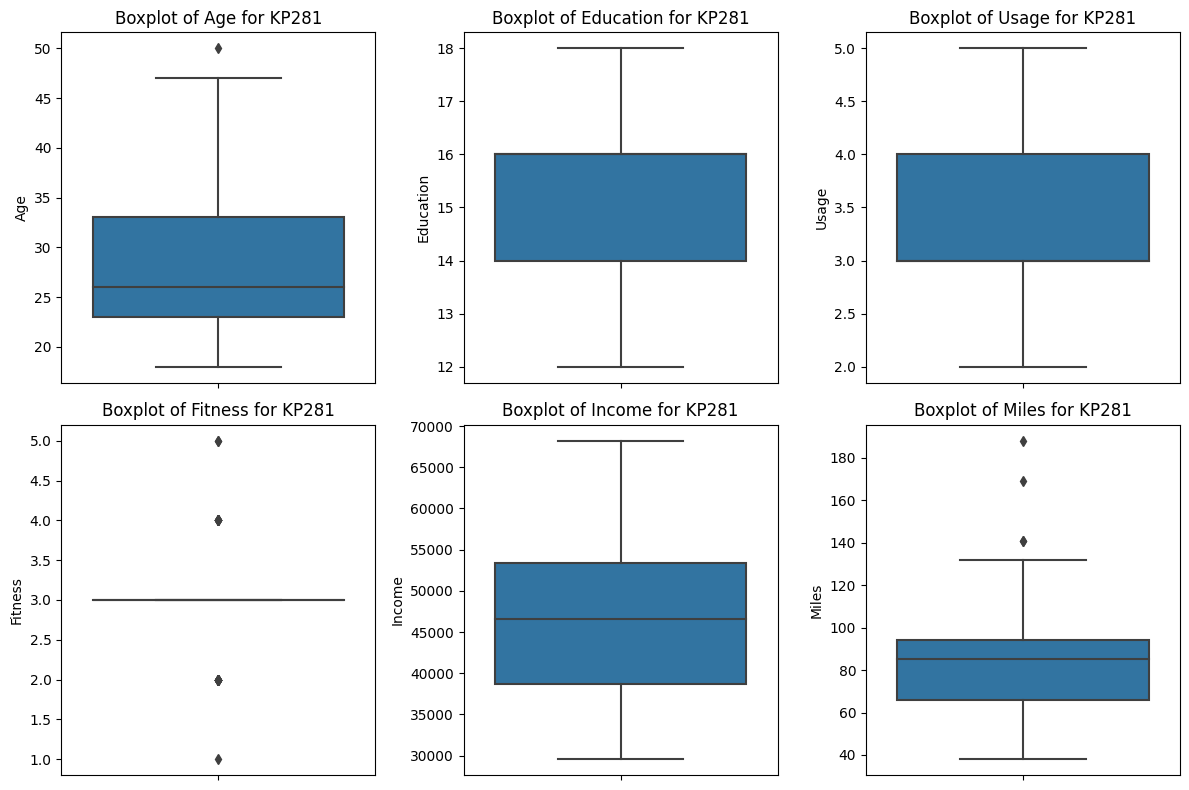

In [59]:
# boxplot for numerical data in KP281
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_kp281, y=column)
    plt.title(f"Boxplot of {column} for KP281")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

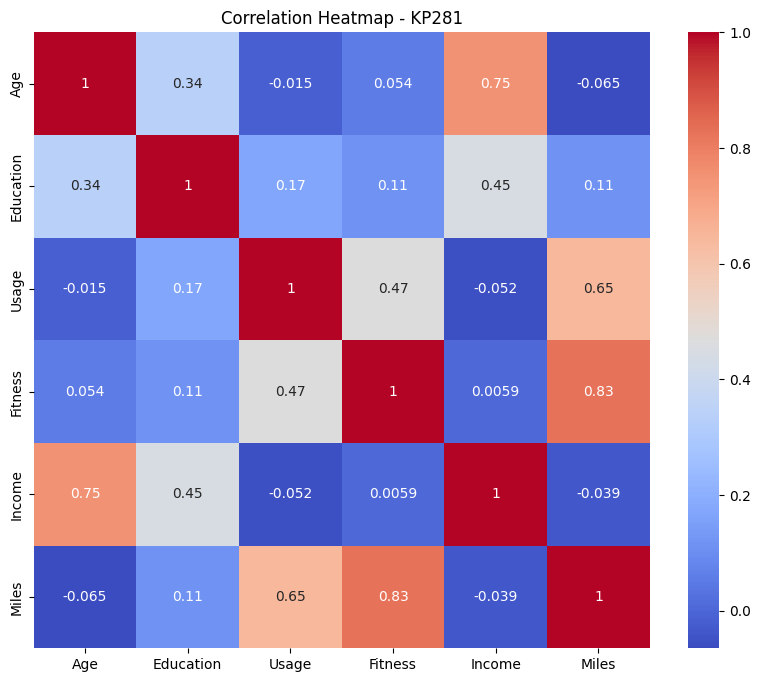

In [60]:
# heatmap for the KP281 threadmill product
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
correlation_matrix = df_kp281[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - KP281")
plt.show()

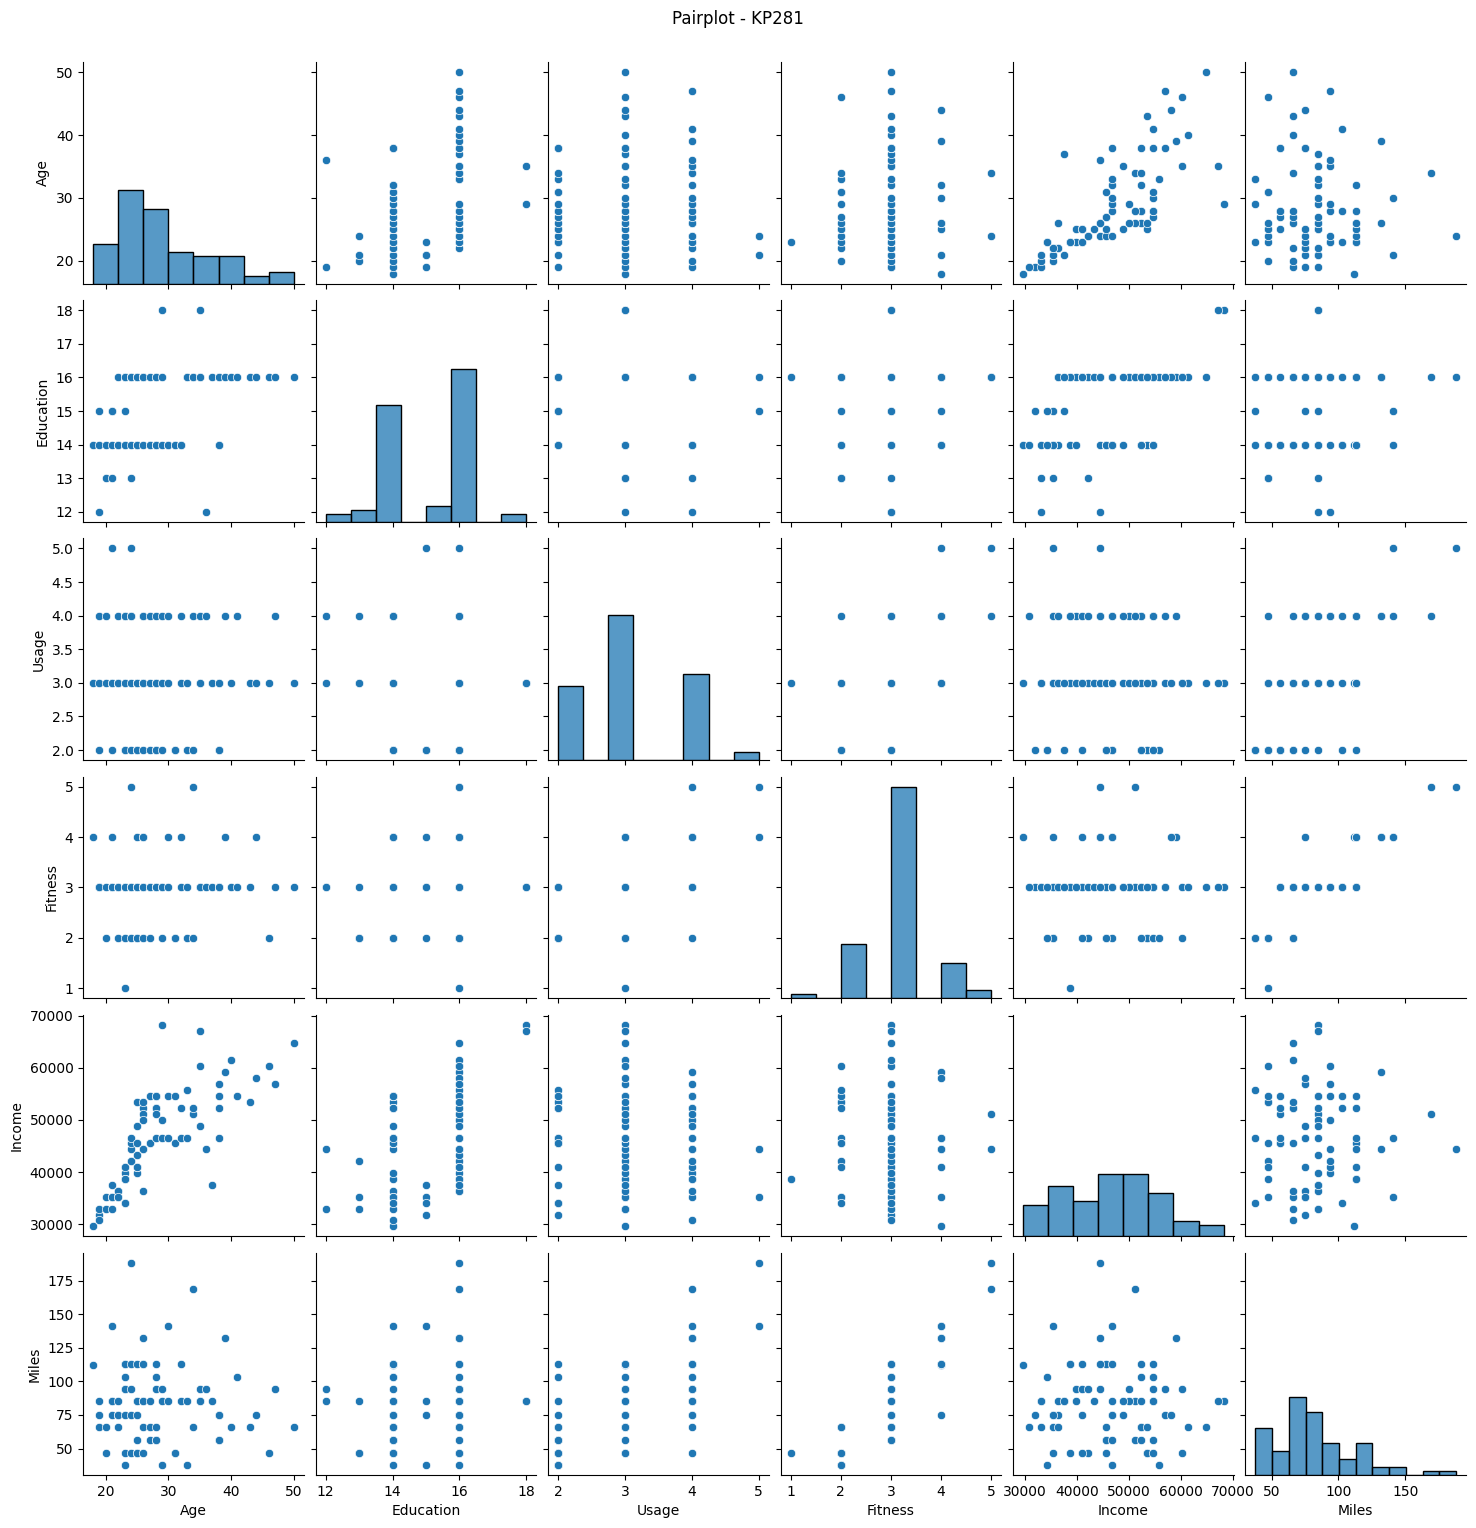

In [61]:
# pairplot for numerical data in KP281
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
sns.pairplot(df_kp281[numerical_columns])
plt.suptitle("Pairplot - KP281", y=1.02)
plt.show()

### Visual Analytics for KP481

/var/folders/7t/wnyn31qs37gg4xdxsbzlpmrh0000gn/T/ipykernel_17693/489642113.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kp481[column], kde=False)


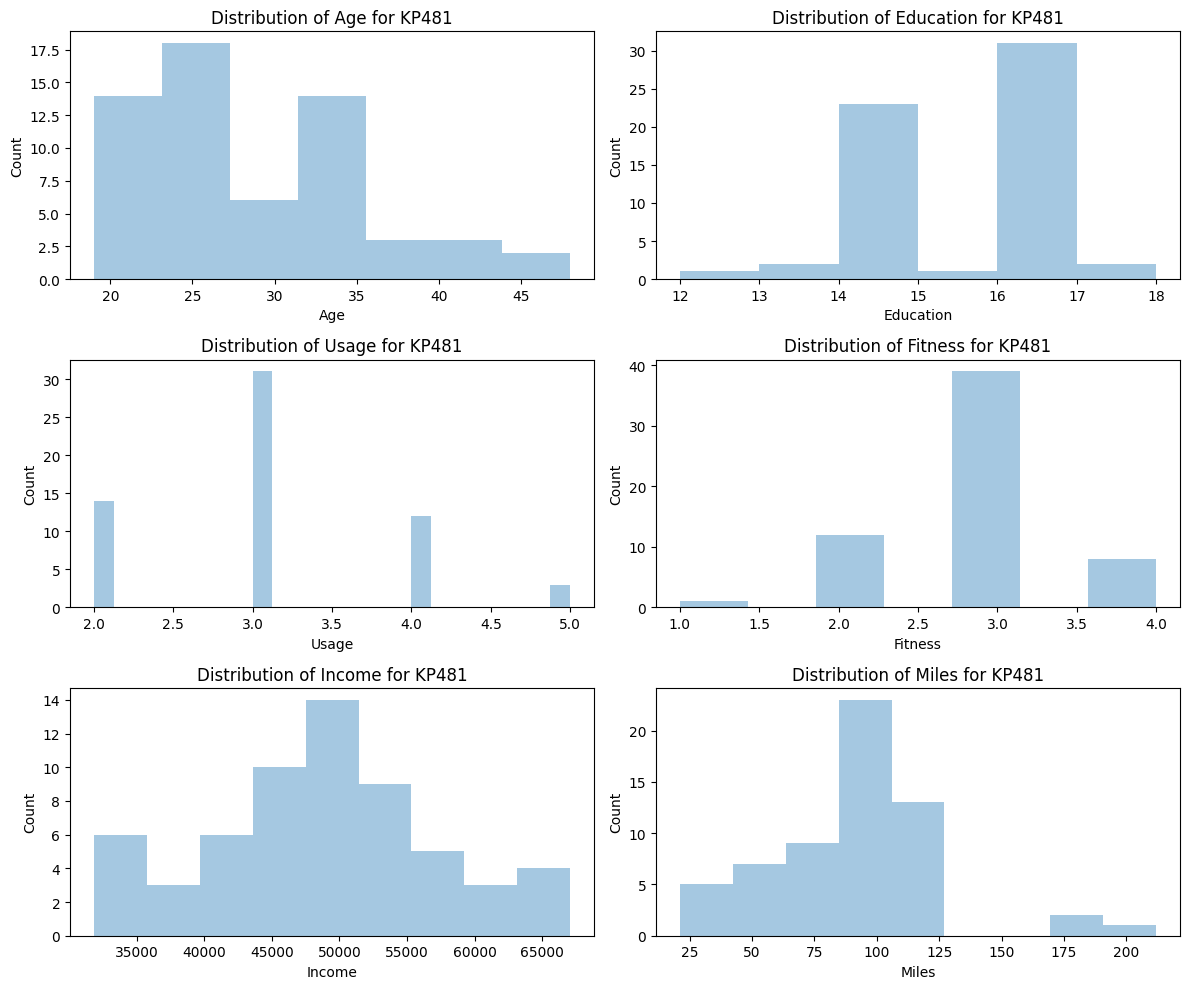

In [62]:
# distplot for numerical data in KP481
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.distplot(df_kp481[column], kde=False)
    plt.title(f"Distribution of {column} for KP481")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

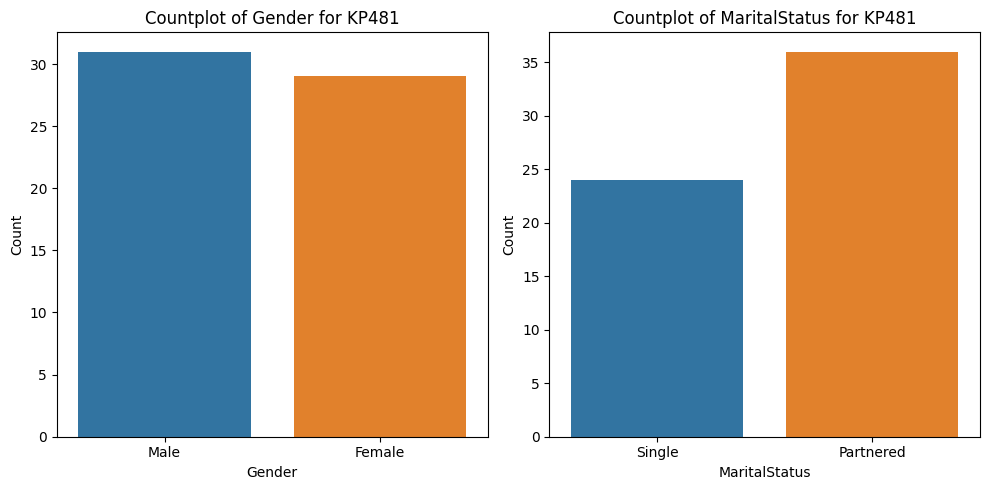

In [63]:
# countplot for categorical data in KP481
categorical_columns = ["Gender", "MaritalStatus"]
plt.figure(figsize=(10, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df_kp481, x=column)
    plt.title(f"Countplot of {column} for KP481")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

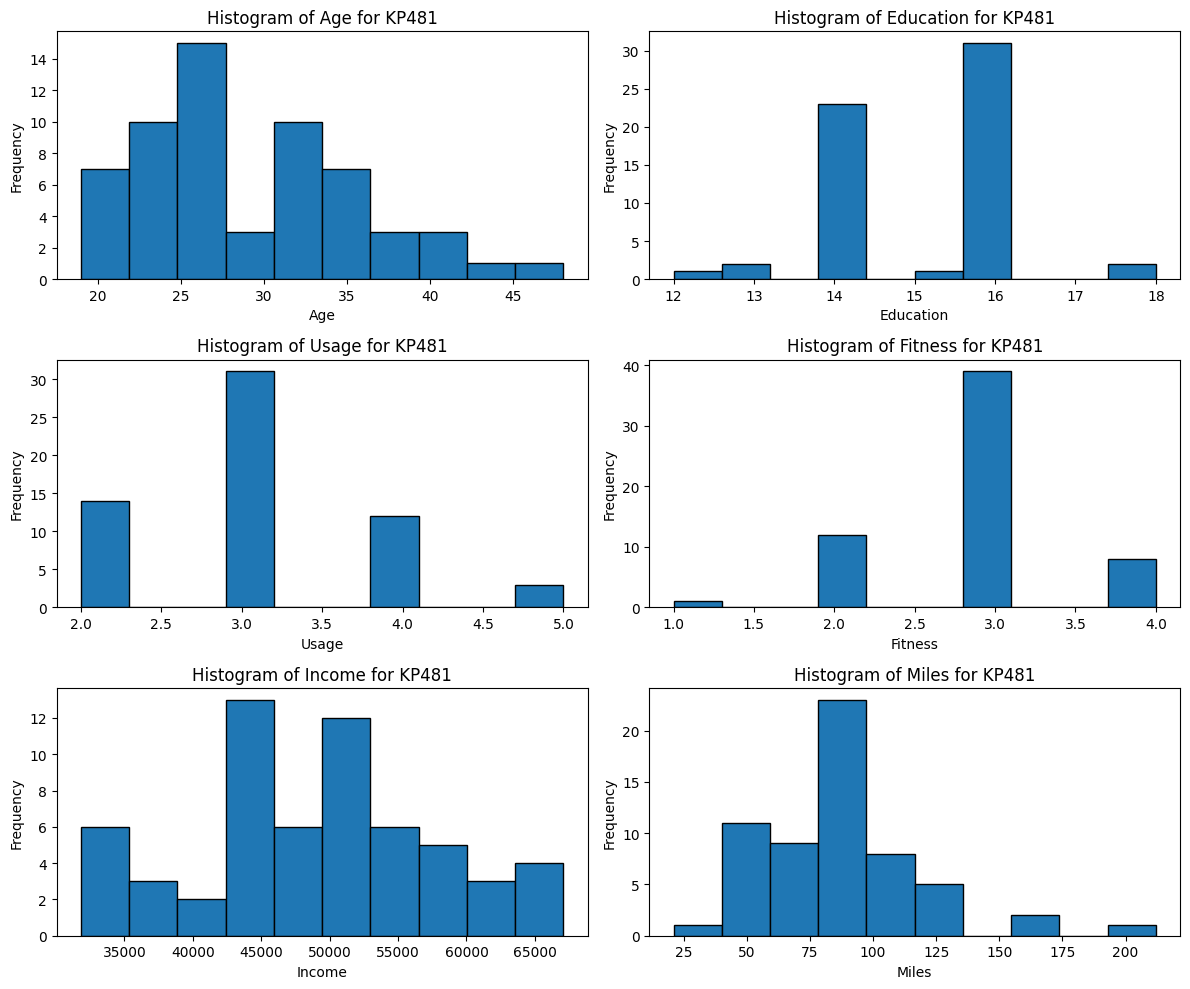

In [64]:
# histograms for all numerical data in KP481
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    plt.hist(df_kp481[column], bins=10, edgecolor="black")
    plt.title(f"Histogram of {column} for KP481")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

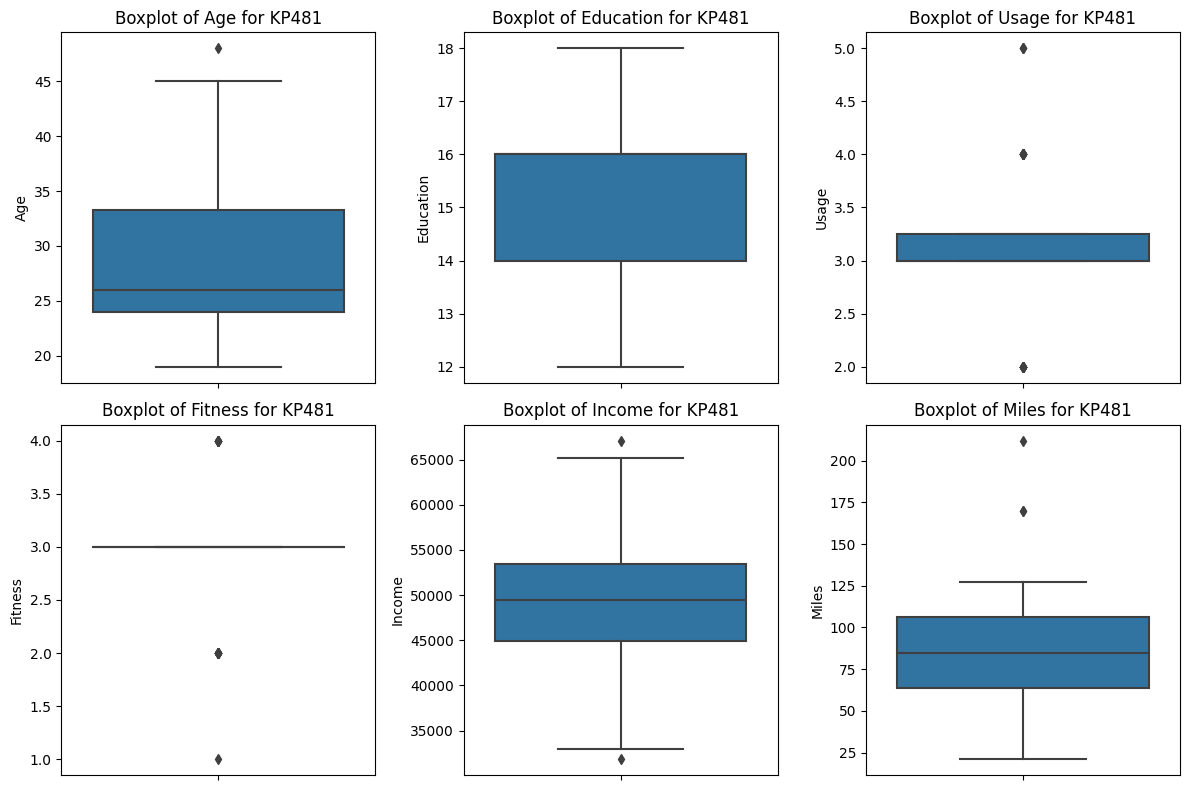

In [65]:
# boxplot for numerical data in KP481
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_kp481, y=column)
    plt.title(f"Boxplot of {column} for KP481")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

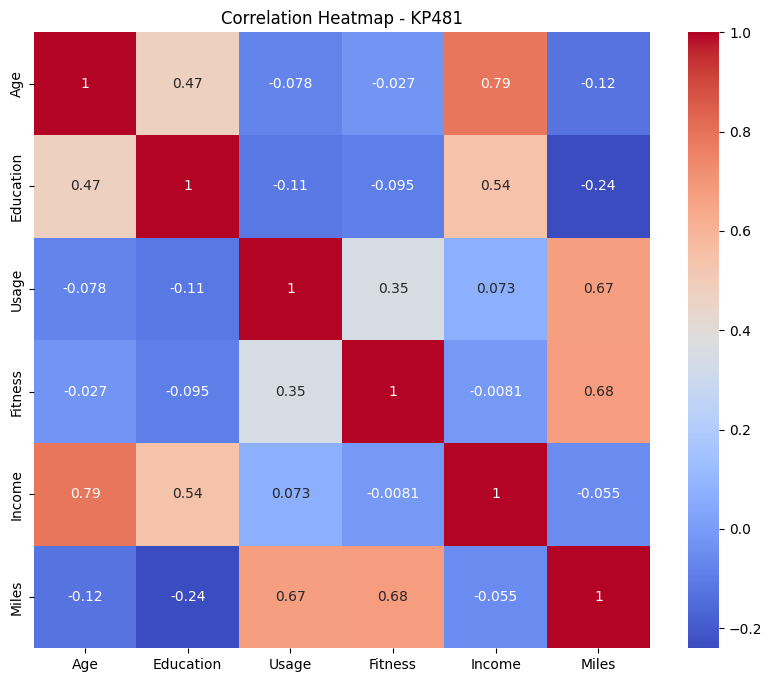

In [66]:
# heatmap for the KP481 threadmill product
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
correlation_matrix = df_kp481[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - KP481")
plt.show()

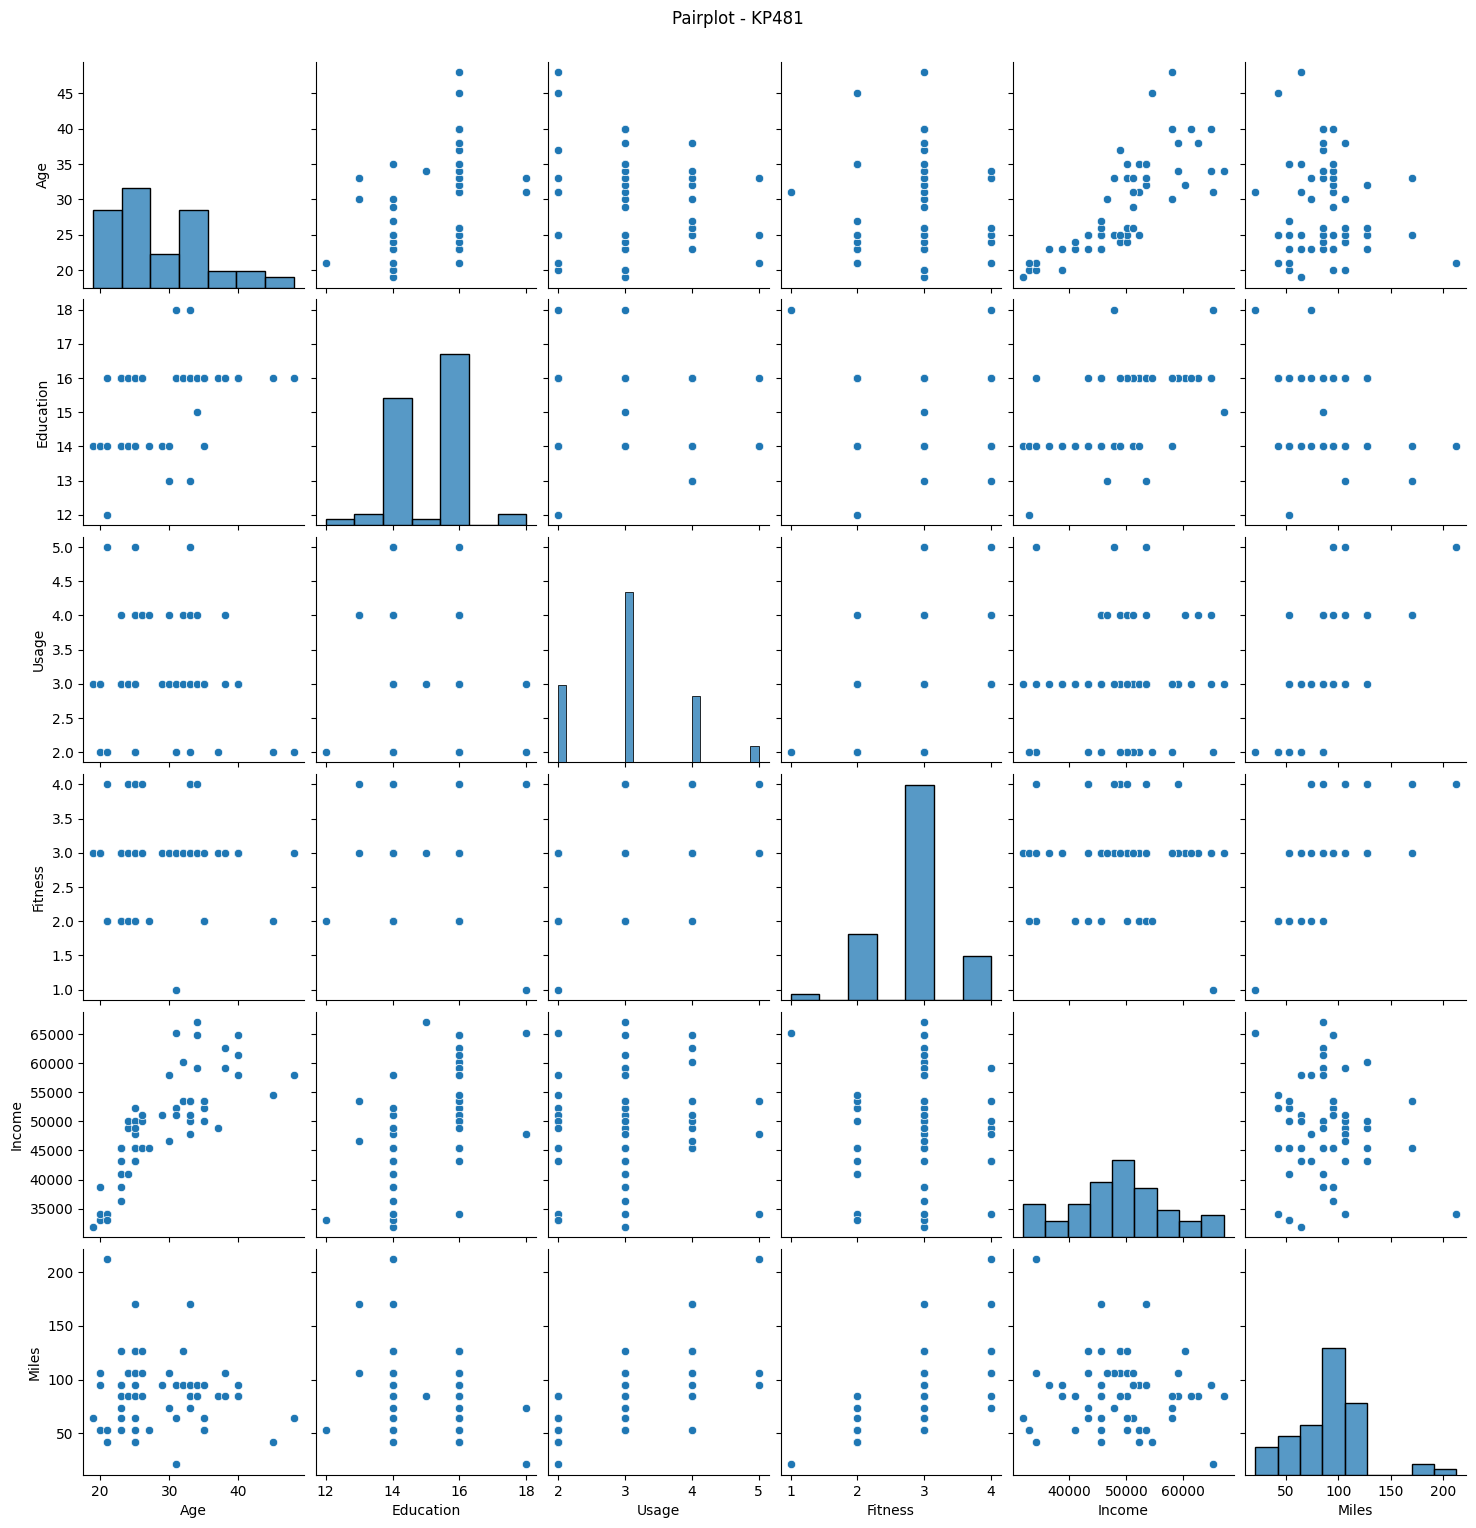

In [67]:
# pairplot for numerical data in KP481
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
sns.pairplot(df_kp481[numerical_columns])
plt.suptitle("Pairplot - KP481", y=1.02)
plt.show()

### Visual Analytics for KP781

/var/folders/7t/wnyn31qs37gg4xdxsbzlpmrh0000gn/T/ipykernel_17693/1601082485.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_kp781[column], kde=False)


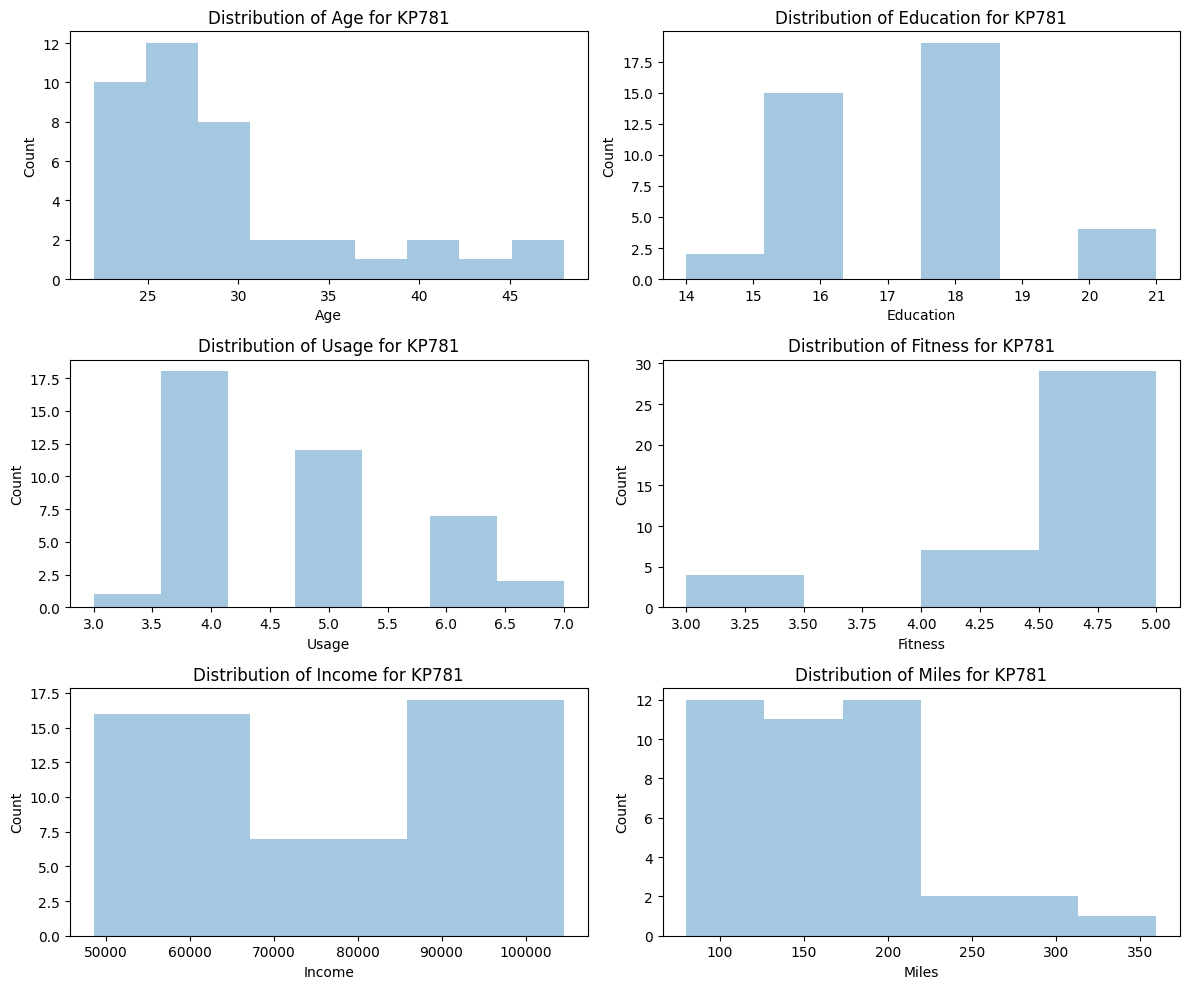

In [68]:
# distplot for numerical data in KP781
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.distplot(df_kp781[column], kde=False)
    plt.title(f"Distribution of {column} for KP781")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

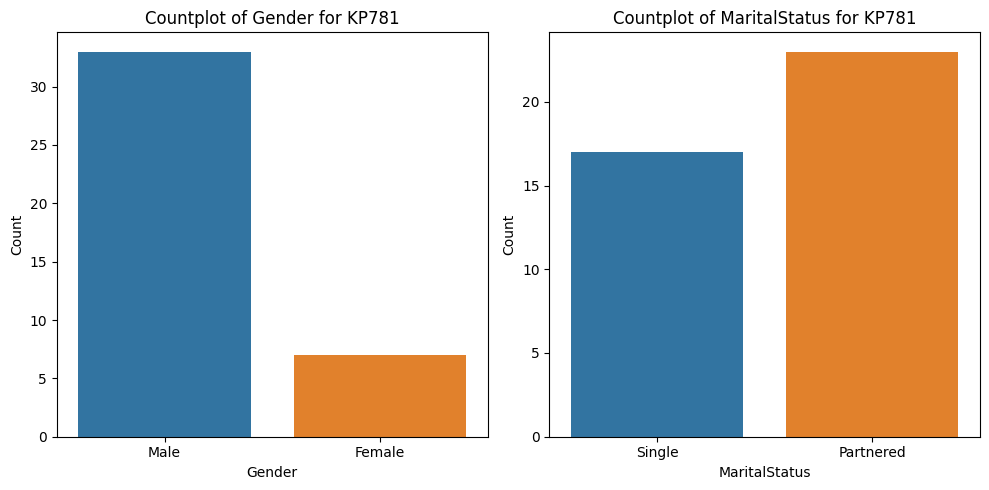

In [69]:
# countplot for categorical data in KP781
categorical_columns = ["Gender", "MaritalStatus"]
plt.figure(figsize=(10, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df_kp781, x=column)
    plt.title(f"Countplot of {column} for KP781")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

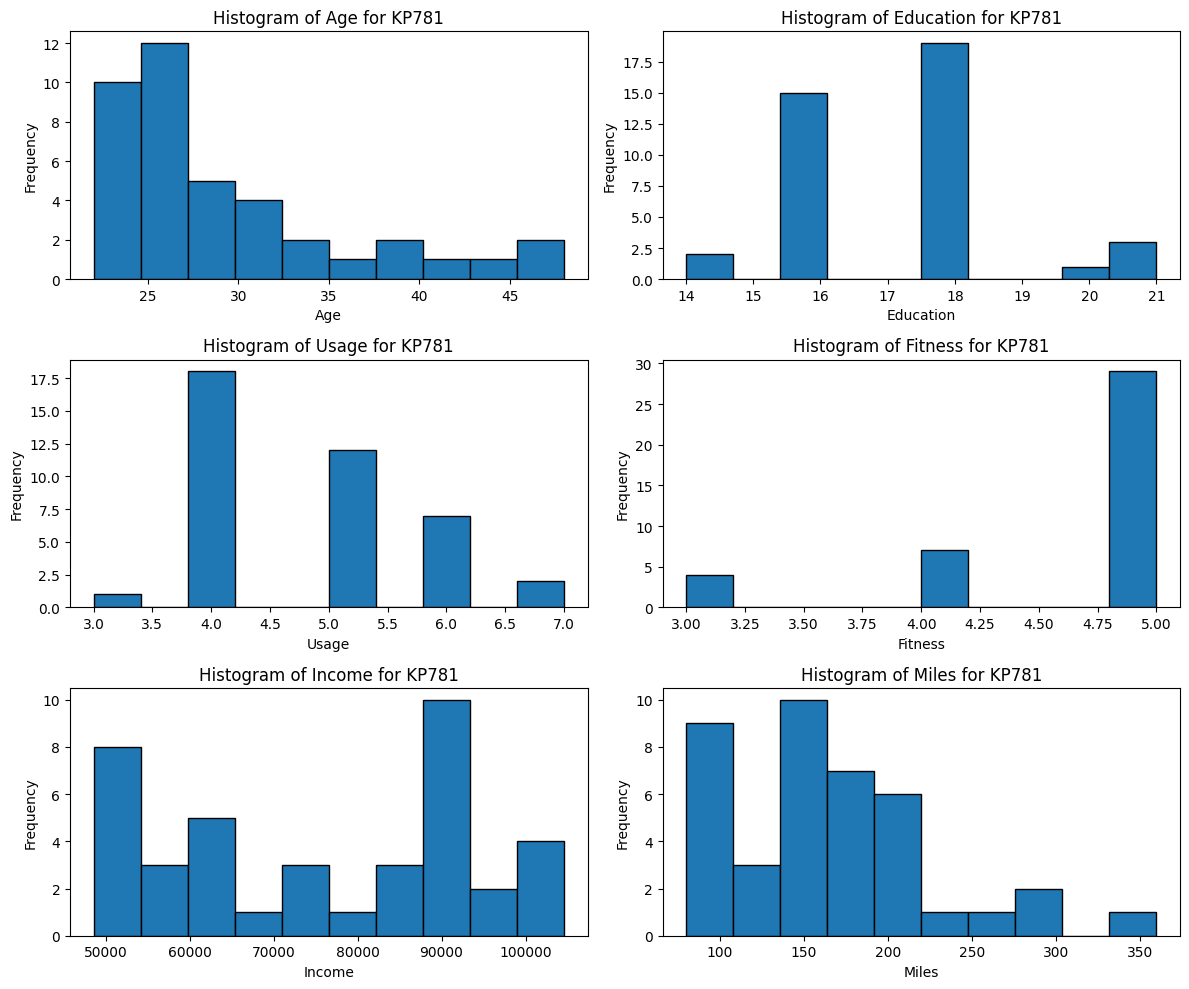

In [70]:
# histograms for all numerical data in KP781
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    plt.hist(df_kp781[column], bins=10, edgecolor="black")
    plt.title(f"Histogram of {column} for KP781")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

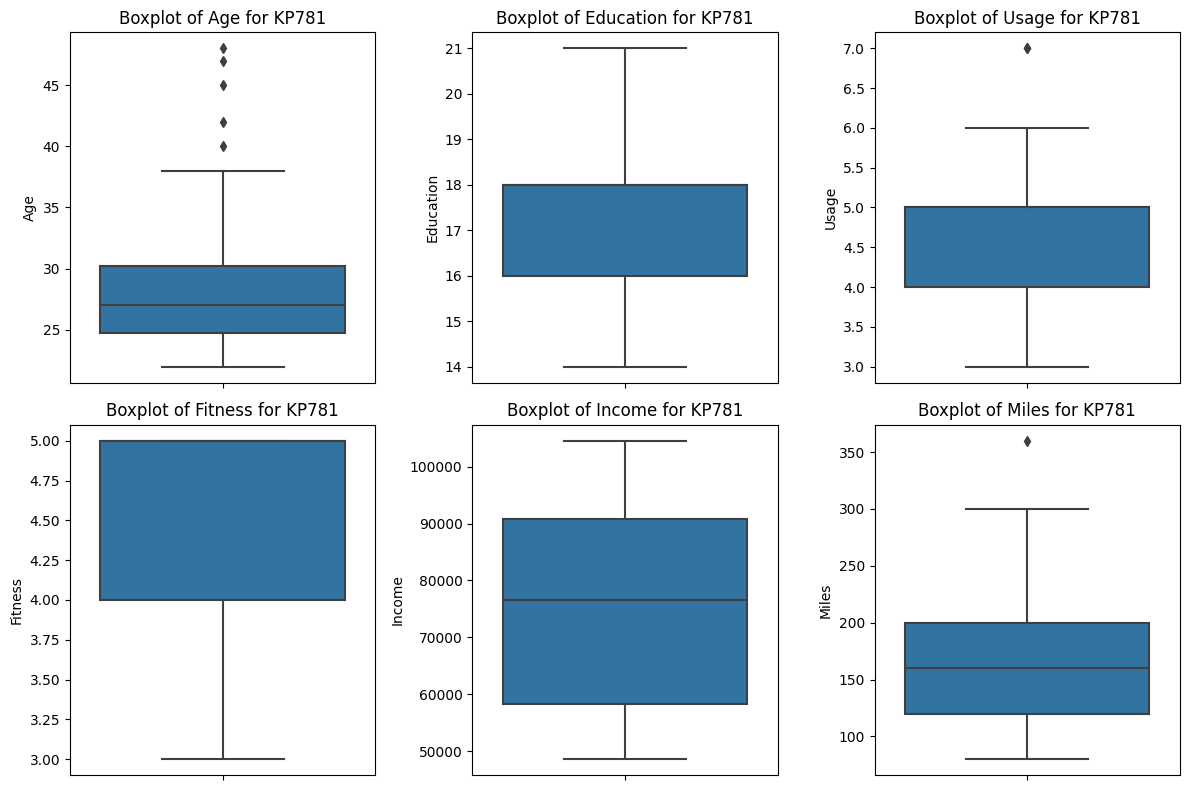

In [71]:
# boxplot for numerical data in KP781
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_kp781, y=column)
    plt.title(f"Boxplot of {column} for KP781")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

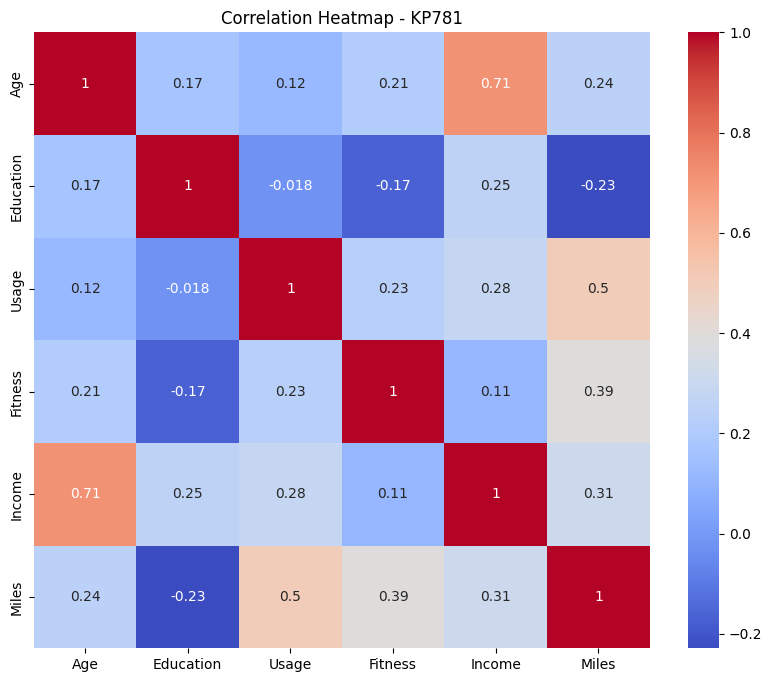

In [72]:
# heatmap for the KP781 threadmill product
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
correlation_matrix = df_kp781[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - KP781")
plt.show()

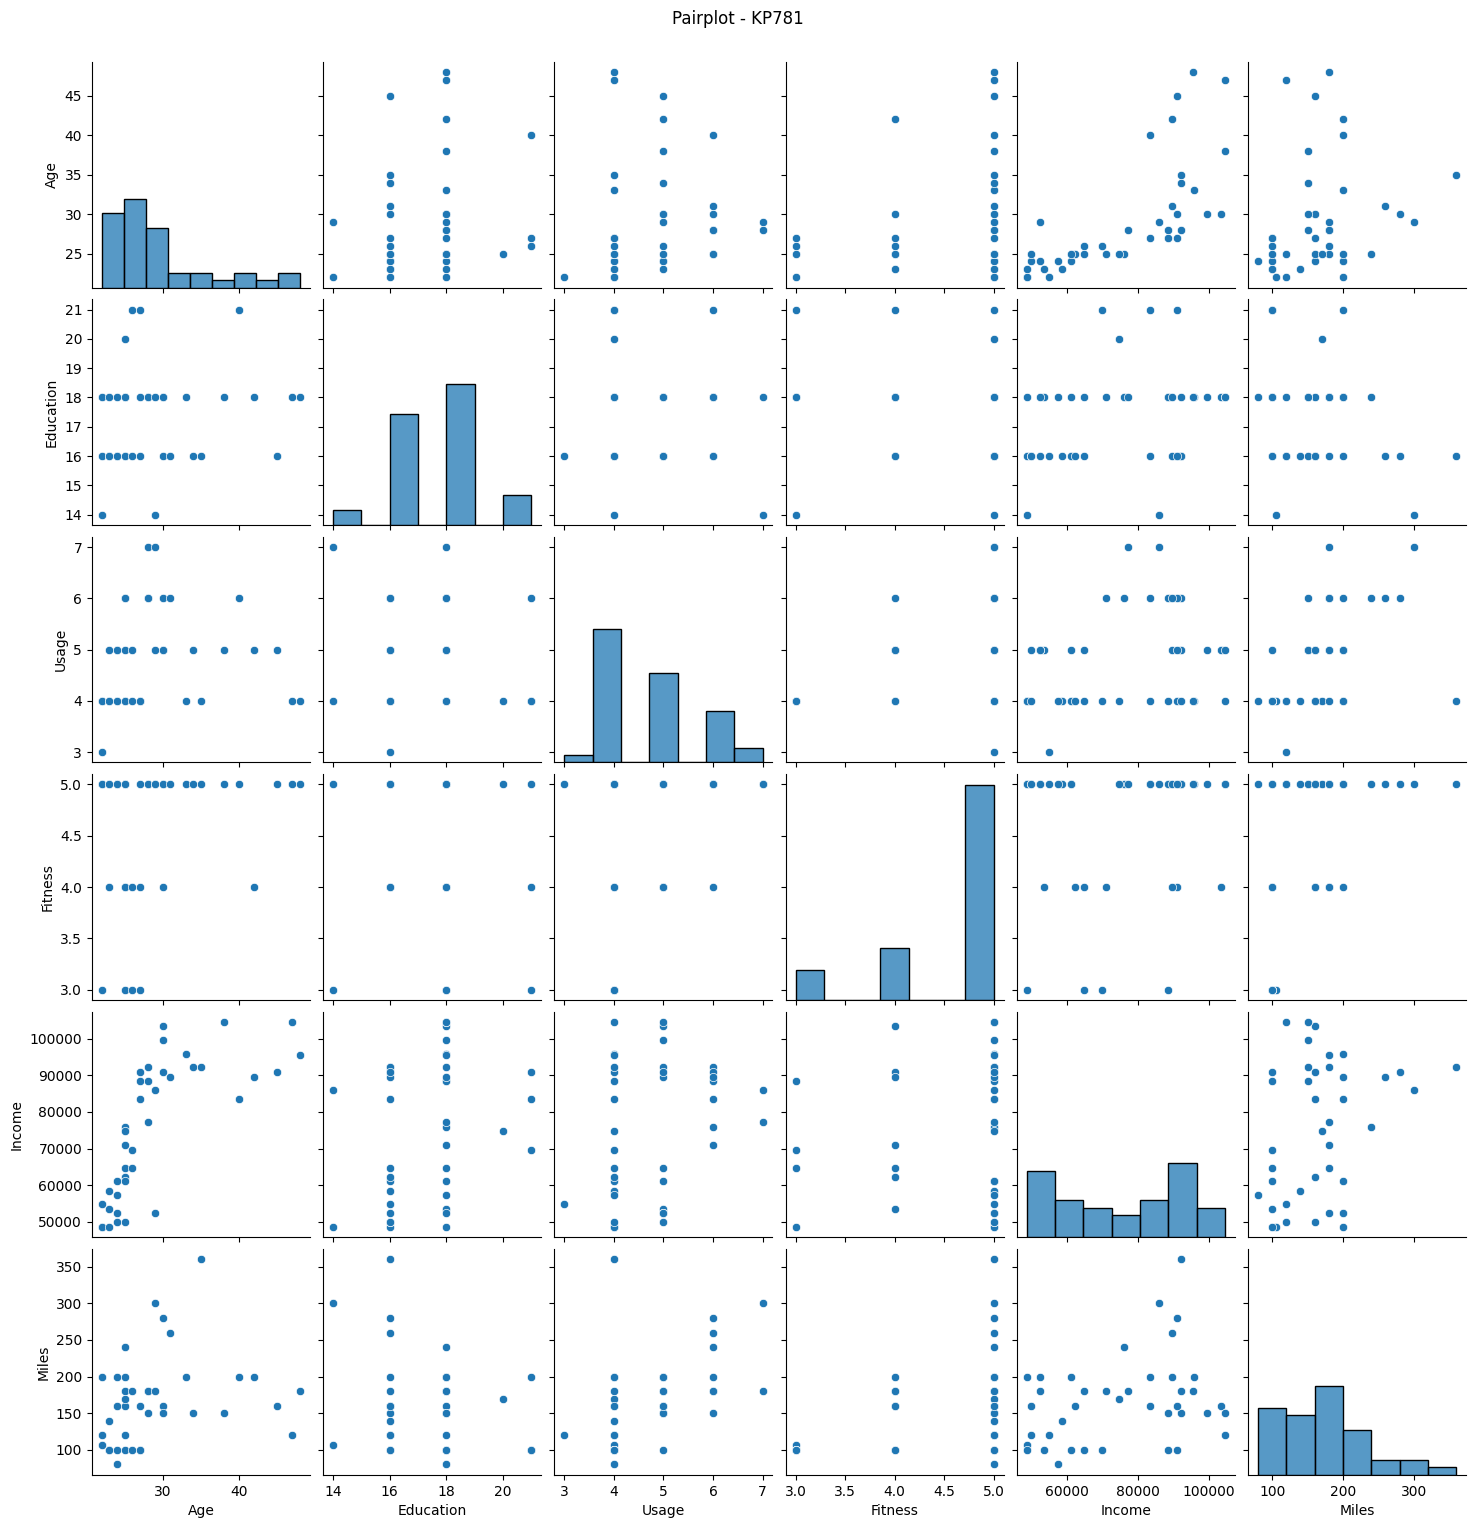

In [73]:
# pairplot for numerical data in KP781
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
sns.pairplot(df_kp781[numerical_columns])
plt.suptitle("Pairplot - KP781", y=1.02)
plt.show()

# 4. Missing Value & Outlier Detection

### Missing Values

In [74]:
missing_values = df.isna().sum()
print(f"Missing Values : \n\n{missing_values}")

Missing Values : 

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


### Outliers

In [75]:
outliers = {}
for column in df.columns:
    if df[column].dtype != object:
        mean = df[column].mean()
        std = df[column].std()
        column_outliers = df[(np.abs(df[column] - mean) > 3 * std)]
        outliers[column] = column_outliers
print("Outliers:")
for column, column_outliers in outliers.items():
    print(f"{column} Outliers:\n{column_outliers}\n")

Outliers:
Age Outliers:
   Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income   
79   KP281   50  Female         16     Partnered      3        3   64809  \

    Miles  
79     66  

Education Outliers:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income   
157   KP781   26  Female         21        Single      4        3   69721  \
161   KP781   27    Male         21     Partnered      4        4   90886   
175   KP781   40    Male         21        Single      6        5   83416   

     Miles  
157    100  
161    100  
175    200  

Usage Outliers:
    Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income   
163   KP781   28   Male         18     Partnered      7        5   77191  \
166   KP781   29   Male         14     Partnered      7        5   85906   

     Miles  
163    180  
166    300  

Fitness Outliers:
Empty DataFrame
Columns: [Product, Age, Gender, Education, MaritalStatus, Usage, Fitness, Income, Miles]
Index: [

# 5. Business Insights based on Non-Graphical and Visual Analysis

### Comments on the range of Attributes:

1. KP281:
    - Age: 
        Youngest Customer: 18 years, Oldest Customer: 50 Years, Average Age: 28.55 Years
    - Number of Years of Education Received: 
        Minimum: 12 Years, Maximum: 18 Years, Average: 15.0375
    - Number of times the product will be in each week: 
        Minimum: 2 times, Maximum: 5 times, Average: 3.0875 times
    - Annual Income (in Dollars): 
        Minimum: 29562, Maximum: 68220, Average: 46418.025
    - Fitness Rating (Scale = 1 to 5 (1 being the lowest score and 5 being the highest)):
        Minimum: 1, Maximum: 5, Average: 2.9625
    - Miles Planned to Walk/ Run Per Week: 
        Minimum: 38, Maximum: 188, Average: 82.7875
    - Number of Customers per Gender: 
        Male: 40, Female: 40
    - Number of Customers per Marital Status: 
        Single: 32, Partnered: 48

2. KP481:
    - Age: 
        Youngest Customer: 19 Years, Oldest Customer: 48 Years, Average Age: 28.9 Years
    - Number of Years of Education Received: Minimum: 12 Years, Maximum: 18 Years, Average: 15.116666666666667 Years
    - Number of times the product will be in each week: 
        Minimum: 2 Times, Maximum: 5 Times, Average: 3.066666666666667 Times
    - Annual Income (in Dollars): 
        Minimum: 31836, Maximum: 67083, Average: 48973.65
    - Fitness Rating (Scale = 1 to 5 (1 being the lowest score and 5 being the highest)):
        Minimum: 1, Maximum: 4, Average: 2.9
    - Miles Planned to Walk/ Run Per Week: 
        Minimum: 21, Maximum: 212, Average: 87.93333333333334
    - Number of Customers per Gender: 
        Male: 31, Female: 29
    - Number of Customers per Marital Status: 
        Single: 24, Partnered: 36

3. KP781:
    - Age: 
        Youngest Customer: 22 Years, Oldest Customer: 28 Years, Average Age: 29.1 Years
    - Number of Years of Education Received:
        Minimum: 14 Years, Maximum: 21 Years, Average: 17.325 Years
    - Number of times the product will be in each week:
        Minimum: 3 Times, Maximum: 7 Times, Average: 4.775 Times
    - Annual Income (in Dollars):
        Minimum: 48556, Maximum: 104581, Average: 75441.575
    - Fitness Rating (Scale = 1 to 5 (1 being the lowest score and 5 being the highest)):
        Minimum: 3, Maximum: 5, Average: 4.625
    - Miles Planned to Walk/ Run Per Week:
        Minimum: 80, Maximum: 360, Average: 166.9
    - Number of Customers per Gender:
        Male: 33, Female: 7
    - Number of Customers per Marital Status:
        Single: 17, Partnered: 23
    
### Comments on the distribution of the variables and relationships between them:
#### From the cross-tabs created in Line #55 the following analysis can be made:

1. KP281:
    - The total number of Partnered Females who have purchased KP281 = 27
    - The total number of Single Females who have purchased KP281 = 13
    - The total number of Partnered Males who have purchased KP281 = 21
    - The total number of Single Males who have purchased KP281 = 19
    - The probability of a female customer purchasing KP281 provided she is partnered = 0.3375
    - The probability of a female customer purchasing KP281 provided she is single = 0.1625
    - The probability of a male customer purchasing KP281 provided he is partnered = 0.2625
    - The probability of a male customer purchasing KP281 provided he is single = 0.2375
    
2. KP481:
    - The total number of Partnered Females who have purchased KP481 = 27
    - The total number of Single Females who have purchased KP481 = 13
    - The total number of Partnered Males who have purchased KP481 = 21
    - The total number of Single Males who have purchased KP481 = 19
    - The probability of a female customer purchasing KP481 provided she is partnered = 0.25
    - The probability of a female customer purchasing KP481 provided she is single = 0.23333
    - The probability of a male customer purchasing KP481 provided he is partnered = 0.35
    - The probability of a male customer purchasing KP481 provided he is single = 0.166667
    
3. KP781:
    - The total number of Partnered Females who have purchased KP781 = 27
    - The total number of Single Females who have purchased KP781 = 13
    - The total number of Partnered Males who have purchased KP781 = 21
    - The total number of Single Males who have purchased KP781 = 19
    - The probability of a female customer purchasing KP781 provided she is partnered = 0.100
    - The probability of a female customer purchasing KP781 provided she is single = 0.075
    - The probability of a male customer purchasing KP781 provided he is partnered = 0.475
    - The probability of a male customer purchasing KP781 provided he is single = 0.350
    

### Comments for each univariate and bivariate plot:
1. KP281:
	- The highest number of customers who purchased KP281 were around the age of 25 years.
	- The highest number of customers who purchased KP281 have had 14 to 16 years of education.
	- Most number of customers who purchased KP281 planned to use the threadmill for 3 times per week.
	- Most number of customer who purchased KP281 gave themselves a fitness rating between 3 and 3.5.
	- Most number of customers who purchased KP281 had an annual income of 45000 to 55000 Dollars.
	- Most customers who purchased KP281 planned to walk or run 60 to 100 miles per week.
	- Equal number of males and females have purchased KP281.
	- Partnered individual were greater among the customers who purchased KP281 than single individual.

2. KP481:
	- The highest number of customers who purchased KP481 were between the age 20 to 25 years.
	- The highest number of customers who purchased KP481 have had 16 to 17 years of education.
	- Most number of customers who purchased KP481 planned to use the threadmill for 3 times per week.
	- Most number of customer who purchased KP481 gave themselves a fitness rating of 3.
	- Most number of customers who purchased KP481 had an annual income of 45000 to 55000 Dollars.
	- Most customers who purchased KP481 planned to walk or run 75 to 125 miles per week.
	- Male customers were slightly greater in number of customers who purchased KP481 than females customers.
	- Partnered individual were greater among the customers who purchased KP481 than single individual.

3. KP781:
	- The highest number of customers who purchased KP781 were around the age of 20 to 30 years.
	- The highest number of customers who purchased KP781 have had around 18 years of education.
	- Most number of customers who purchased KP781 planned to use the threadmill for 3 to 4 times per week.
	- Most number of customer who purchased KP781 gave themselves a fitness rating between 4 and 5.
	- Most number of customers who purchased KP781 had an annual income of 90000 to 100000 Dollars
	- Most customers who purchased KP781 planned to walk or run 100 to 200 miles per week.
	- Male customers were greater (nearly 5x times) in number of customers who purchased KP481 than females customers.
	- Partnered individual were greater among the customers who purchased KP781 than single individual.

# 6. Recommendations

1. Targeted marketing campaigns can be developed and aimed at individual according to the age, annual income, years of education etc. For example, KP281 and KP481 can be marketed to younger adults, both KP281 and KP481 can also be marketed to people with an annual income aroud 50000. On the other hand, KP781 can be marketed to older adults and to people with an annual income of around 100000 Dollars.

2. Products can be developed such that, it caters the application in a better way, for example, KP781 was found to be the preferred choice among customers who walked or ran for 100 to 200 miles, additional features can be added to the threadmill such as performance tracking, workout programs that can be customised etc.

3. Since in all three products the partnered individual were greater in number of customers than the single individuals, a customer engagement stratergy can be put in place which focuses on explaining the advantages of working out and keeping fit is rewarding.

4. Events such as "Threadmill Walk-thon", "Threadmill Marathon" etc can be arranged (similar to what a automobile brand would do by organising a ride or creating a club) which will create a community.